In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [97]:
#HIGH RES
# par1min = -16
# par1max = 16
# par1step = .05
# par2min = -16
# par2max = 16
# par2step = .05

# par1min = -10
# par1max = 20
# par1step = .05
# par2min = -20
# par2max = 10
# par2step = .05

#which has no extra for each dimension
# par1res = np.arange(par1min,par1max,par1step)
# par2res = np.arange(par2min,par2max,par2step)

#REGULAR RES
par1min = -16
par1max = 16
par1step = .01
par2min = -16
par2max = 16
par2step = .01

#3D res
# par1min = -15
# par1max = 10
# par1step = .1
# par2min = -16
# par2max = 16
# par2step = .1
# par3min = -5
# par3max = 13
# par3step = .1

# # which goes an extra for each dimension
par1res = np.arange(par1min,par1max+(par1step/2),par1step)
par2res = np.arange(par2min,par2max+(par2step/2),par2step)


# par1res_reg = np.arange(par1min,par1max+(par1step/2),.1)
# par2res_reg = np.arange(par2min,par2max+(par2step/2),.1)
# par3res = np.arange(par3min,par3max+(par3step/2),par3step)

In [51]:
#define a set of colors and labels for use in the figure
viridian = '#277C5E'
new_viridian = '#29803C'
xanthous = '#F8AB25'
new_xanthous = '#F6AE2D'
flame = '#E46A3A'
new_flame = '#F26419'
redder = '#E92545'
french_gray = '#BEBFC5'
airforce_blue = '#5F8EB0'
nicered = '#D32F2F'
desaturatedred = '#AF4B44'
nicegreen = '#388E3C'
desaturatedgreen = '#808D81'
neuroncolors = [(10/256,33/256,88/256),(29/256,92/256,167/256),(88/256,155/256,203/256)]
neuronlabels = ['LP','PY','PD']

In [49]:
#define a set of functions for quick visualization
def get_avg_slice(indiv, slicetype = None):
    if slicetype == "multistability_check":
        data = np.loadtxt("./Specifically Evolved HP mechanisms/Every Circuit/%s/HPAgnosticAverage_highres_multistability.dat"%indiv)
        data = data.reshape((len(par2res),len(par1res),2,3))
        avgs = data[:,:,0,:]
        multistable = np.zeros_like(avgs[:,:,0])
        multistable[np.where(data[:,:,1,0]!=0)] = 1
        avgs = np.swapaxes(avgs,1,0)
        multistable = multistable.swapaxes(0,1)
        return avgs, multistable
    if slicetype == "high_res":
        avgs = np.loadtxt("./Specifically Evolved HP mechanisms/Every Circuit/%s/HPAgnosticAverage_highres.dat"%indiv)
        avgs = avgs.reshape((len(par2res),len(par1res),3))
        avgs = np.swapaxes(avgs,1,0)
        return avgs
    if slicetype == 'netchange':
        avgs = np.loadtxt("./Convenient HP Mechanisms/goodnetchange.dat")
        avgs = avgs.reshape((len(par2res),len(par1res),2))
        avgs = np.swapaxes(avgs,1,0)
        return avgs
    if slicetype == 'newrho':
        data = np.loadtxt("./Specifically Evolved HP mechanisms/Every Circuit/%s/HPAgnosticAverage_highres_newrho.dat"%indiv)
        data = data.reshape((len(par2res),len(par1res),2,3))
        avgs = data[:,:,0,:]
        avgs = np.swapaxes(avgs,1,0)
        dutycycles = data[:,:,1,:]
        dutycycles = dutycycles.swapaxes(1,0)
        return avgs,dutycycles
    if slicetype == '3D':
        avgs = np.loadtxt("./Test3DHPonPyloricSolutions/HPAgnosticAverage3D_%s.dat"%indiv)
        avgs = avgs.reshape((len(par1res),len(par2res),len(par3res),3))
        # avgs = np.swapaxes(avgs,1,0) #really unsure how i will need to restructure this
        return avgs
    else:
        avgs = np.loadtxt("./Specifically Evolved HP mechanisms/Every Circuit/%s/HPAgnosticAverage.dat"%indiv)
        avgs = avgs.reshape((len(par2res),len(par1res),3))
        avgs = np.swapaxes(avgs,1,0)
        return avgs

def get_proxy_slice(indiv):
    '''returns a masked array with the averages of all the stable points, and a list of lambda functions for each oscillatory point, which takes the variables lb and ub and determines HP movement '''
    data = np.loadtxt("./Specifically Evolved HP mechanisms/Every Circuit/%s/HPAgnosticAverage_highres_newrho.dat"%indiv)
    # data = np.loadtxt("./Specifically Evolved HP mechanisms/Every Circuit/%s/HPAgnosticAverage.dat"%indiv)
    data = data.reshape(len(par2res),len(par1res),2,3)
    avgs = data[:,:,0,:]
    avgs = avgs.swapaxes(0,1)
    duty_cycles = data[:,:,1,:]
    duty_cycles = duty_cycles.swapaxes(0,1)
    masked_stable_avgs = np.ma.masked_where(duty_cycles != 0,avgs)
    masked_oscillatory_avgs = np.ma.masked_where(duty_cycles == 0, avgs)
    masked_oscillatory_dutycycles = np.ma.masked_where(duty_cycles == 0, duty_cycles)

    return masked_stable_avgs, masked_oscillatory_avgs, masked_oscillatory_dutycycles

def get_osc_proxy(masked_oscillatory_avgs, masked_oscillatory_dutycycles,LB,UB):
    pred_HP_movement = (np.ones_like(masked_oscillatory_dutycycles)-masked_oscillatory_dutycycles)*LB + (masked_oscillatory_dutycycles)*UB - masked_oscillatory_avgs
    # pred_HP_movement = gaussian_filter(pred_HP_movement, sigma=.2) #doesn't really work, just hugs edges
    return pred_HP_movement
    

def get_pyloric_slice(indiv,high_res=False):
    if high_res:
        pyloricslice = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/pyloricslice_highres.dat'%indiv).reshape((len(par1res),len(par2res)))
    else:
        pyloricslice = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/pyloricslice.dat'%indiv).reshape((len(par1res),len(par2res)))
    pyloricslice = np.swapaxes(pyloricslice,1,0)
    return pyloricslice

def plot_outline(indiv,colorstring,ax=None):
    pyloricslice = get_pyloric_slice(indiv,high_res=True)
    if ax==None:
        plt.contour(par1res,par2res,pyloricslice,levels=[.3],colors=colorstring)
    else:
        ax.contour(par1res,par2res,pyloricslice,levels=[.3],colors=colorstring)

#the BIG useful function that calls all the other ones. Adjust aesthetic preferences within this funciton
def plot_HP_contours(indiv,LB,UB,neuronidxs,color,axis=None,plotavgs=True,tolerance = 0,plotoutline=True):
    if (len(neuronidxs) > 1):
        plotavgs = False
    masked_stable_avgs, masked_oscillatory_avgs, masked_oscillatory_dutycycles = get_proxy_slice(indiv)
    if axis==None:
        if plotavgs:
            plt.rcParams['axes.facecolor'] = french_gray
        else:
            plt.rcParams['axes.facecolor'] = 'white'
        if plotoutline:
            plot_outline(indiv, 'k', True, ax=axis)
        if plotavgs:
            plt.pcolormesh(par1res,par2res,masked_stable_avgs[:,:,neuronidxs[0]],cmap="Blues")
            plt.colorbar()
        for i in range(len(neuronidxs)):
            neuronidx = neuronidxs[i]
            osc_proxy = get_osc_proxy(masked_oscillatory_avgs,masked_oscillatory_dutycycles,LB[i],UB[i])
            if LB[i] != UB[i]:
                plt.contourf(par1res,par2res,masked_stable_avgs[:,:,neuronidx],levels=[LB[i],UB[i]],colors=color[i],corner_mask=False)
            else:
                plt.contour(par1res,par2res,masked_stable_avgs[:,:,neuronidx],levels=[LB[i]],colors=color[i],corner_mask=False)
            if tolerance == 0:
                plt.contour(par1res,par2res,osc_proxy[:,:,neuronidx],levels=[0],colors=color[i],corner_mask=False)
            else: 
                plt.contourf(par1res,par2res,osc_proxy[:,:,neuronidx],levels=[-tolerance,tolerance],colors=color[i],corner_mask=False)
            # plt.contour(par1res,par2res,masked_oscillatory_avgs[:,:,neuronidx],levels=[LB[i]],colors=color[i]) 
            
    else:
        if plotavgs:
            axis.rcParams['axes.facecolor'] = french_gray
        else:
            axis.rcParams['axes.facecolor'] = 'white'
        if plotoutline:
            plot_outline(indiv, 'k', True, ax=axis)
        if plotavgs:
            axis.pcolormesh(par1res,par2res,masked_stable_avgs[:,:,neuronidx],cmap="Blues")
            axis.colorbar()
        for i in range(len(neuronidxs)):
            neuronidx = neuronidxs[i]
            osc_proxy = get_osc_proxy(masked_oscillatory_avgs,masked_oscillatory_dutycycles,LB[i],UB[i])
            if LB[i] != UB[i]:
                axis.contourf(par1res,par2res,masked_stable_avgs[:,:,neuronidx],levels=[LB[i],UB[i]],colors=color[i],corner_mask=False)
            else:
                axis.contour(par1res,par2res,masked_stable_avgs[:,:,neuronidx],levels=[LB[i]],colors=color[i],corner_mask=False)
            if tolerance == 0:
                axis.contour(par1res,par2res,osc_proxy[:,:,neuronidx],levels=[0],colors=color[i],corner_mask=False)
            else: 
                axis.contourf(par1res,par2res,osc_proxy[:,:,neuronidx],levels=[-tolerance,tolerance],colors=color[i],corner_mask=False) 

In [ ]:
# OLD HAND-MADE CONTOUR FUNCTIONALITY FROM BEFORE I DISCOVERED CONTOUR:

# def get_pyloric_outline(indiv,high_res=False):
#     pyloricslice = get_pyloric_slice(indiv,high_res)
#     borderlist_left = []
#     borderlist_right = []
#     for i in range(len(pyloricslice)):
#         for j in range(2,len(pyloricslice[0])-1):
#             if (pyloricslice[i,j-2] < .3 and pyloricslice[i,j-1] < .3 and pyloricslice[i,j]>=.3 and pyloricslice[i,j+1]>=.3):
#                 borderlist_left.append([par1res[j-1],par2res[i]])
#                 # print('left @ (%s,%s):'%(par2res[j],par1res[i]),pyloricslice[i,j-1],' right:',pyloricslice[i,j])
#             if (pyloricslice[i,j-2] >= .3 and pyloricslice[i,j-1] >= .3 and pyloricslice[i,j]<.3 and pyloricslice[i,j+1]<.3):
#                 borderlist_right.append([par1res[j],par2res[i]])
#     return [borderlist_left,borderlist_right[::-1]]

# def plot_outline(indiv,colorstring,high_res=False,ax=None):
#     outline = get_pyloric_outline(indiv,high_res)
#     for border in range(len(outline)):
#         if len(outline[border])!=0:
#             test = outline[border]
#             test.append(outline[(border+1)%(len(outline))][0])
#             test = np.array(test)
#             if ax==None:
#                 plt.plot(test[:,0],test[:,1],color=colorstring)
#             else:
#                 ax.plot(test[:,0],test[:,1],color=colorstring,linewidth=.5)


# def nullcline(par, target, averages, tolerance = 0.0015,direction='leftright'):
#     #averages should be full matrix, function separates out the relevant parts
#     #tolerance is the maximum distance away from the target that is considered "close" (i.e. won't cause inertia)
#     nullcline_pts = []
#     if par == 'par1':
#         vals = averages[:,:,0]
#     elif par == 'par2': 
#         vals = averages[:,:,2]
#     if direction == 'leftright':
#         for i in range(len(vals)):
#             for j in range(len(vals[0])-1):
#                 if (vals[i,j]-target>-tolerance) and (vals[i,j]-target < 0) and (vals[i,j+1]-target > 0): #also covers the stability criteria
#                     nullcline_pts.append([par1res[j],par2res[i]])
#     elif direction == 'updown':
#         for j in range(len(vals[0])):
#             for i in range(len(vals)-1):
#                 if (vals[i,j]-target>-tolerance) and (vals[i,j]-target < 0) and (vals[i+1,j]-target > 0): #also covers the stability criteria
#                     nullcline_pts.append([par1res[j],par2res[i]])
#     else:
#         raise TypeError('not a valid parameter specification')
#     #now order the points that have been collected, starting from the corner and repeatedly adding the closest point
#     nullcline_pts = np.array(nullcline_pts)
#     return nullcline_pts

# def nearest_neighbor_ordering(ptlist,color='black',lineseparator = .5):
#     nullcline_pts = ptlist
#     ordered_nullcline_pts = [[]]
#     ordered_nullcline_pts[0].append(nullcline_pts[0]) #take the first point 
#     nullcline_pts = nullcline_pts[1:]          #and then remove it from further consideration
#     num_pts = len(nullcline_pts)
#     line_count = 0
#     k = 1
#     # print(nullcline_pts)
#     for i in range(0,num_pts):
#         # print(nullcline_pts - ordered_nullcline_pts[line_count][k-1])
#         dists = np.linalg.norm(nullcline_pts-np.array(ordered_nullcline_pts[line_count][k-1]),axis=1) #find every point's distance from the previously collected point
#         # print('lendists:',len(dists))
#         closest_idx = np.where(dists == np.min(dists))[0]
#         if np.min(dists) > lineseparator:
#             line_count += 1
#             k = 0
#             ordered_nullcline_pts.append([])
#             lowest = nullcline_pts[np.where(nullcline_pts[:,0]==np.min(nullcline_pts[:,0]))[0]]
#             lowestleft_idx = np.where(lowest[:,1]==np.min(lowest[:,1]))[0]
#             closest_idx = lowestleft_idx #start at lowest remaining pt
#             # print('starting new line:',nullcline_pts[closest_idx][0][:])
#         # else: 
#             # print('continue line:', nullcline_pts[closest_idx][0][:])
#         ordered_nullcline_pts[line_count].append(nullcline_pts[closest_idx][0][:]) #take the one closest to previously collected
#         # print('lenpts:',len(nullcline_pts))
#         # print(closest_idx)
#         if (len(closest_idx) > 1):
#             print('lenflag')
#         nullcline_pts = np.delete(nullcline_pts, (closest_idx[0]), axis=0)#and then remove it from further consideration
#         k += 1
#     for i in range(line_count+1):
#         ordered_pts = np.array(ordered_nullcline_pts[i])
#         # print(ordered_pts)
#         plt.plot(ordered_pts[:,0],ordered_pts[:,1],color=color)

# def plot_nullcline(par,target,averages, color,tolerance=.1, lineseparator = .5):
#     leftright = nullcline(par,target,averages,tolerance,direction='leftright')
#     updown = nullcline(par,target,averages,tolerance,direction='updown')
#     nullcline_pts = np.unique(np.concatenate((leftright,updown)),axis=0)
#     ordered_nullcline_pts = [[]]
#     ordered_nullcline_pts[0].append(nullcline_pts[0]) #take the first point 
#     nullcline_pts = nullcline_pts[1:]          #and then remove it from further consideration
#     num_pts = len(nullcline_pts)
#     line_count = 0
#     k = 1
#     # print(nullcline_pts)
#     for i in range(0,num_pts):
#         # print(nullcline_pts - ordered_nullcline_pts[line_count][k-1])
#         dists = np.linalg.norm(nullcline_pts-np.array(ordered_nullcline_pts[line_count][k-1]),axis=1) #find every point's distance from the previously collected point
#         # print('lendists:',len(dists))
#         closest_idx = np.where(dists == np.min(dists))[0]
#         if np.min(dists) > lineseparator:
#             line_count += 1
#             k = 0
#             ordered_nullcline_pts.append([])
#             lowest = nullcline_pts[np.where(nullcline_pts[:,0]==np.min(nullcline_pts[:,0]))[0]]
#             lowestleft_idx = np.where(lowest[:,1]==np.min(lowest[:,1]))[0]
#             closest_idx = lowestleft_idx #start at lowest remaining pt
#             # print('starting new line:',nullcline_pts[closest_idx][0][:])
#         # else: 
#             # print('continue line:', nullcline_pts[closest_idx][0][:])
#         ordered_nullcline_pts[line_count].append(nullcline_pts[closest_idx][0][:]) #take the one closest to previously collected
#         # print('lenpts:',len(nullcline_pts))
#         # print(closest_idx)
#         if (len(closest_idx) > 1):
#             print('lenflag')
#         nullcline_pts = np.delete(nullcline_pts, (closest_idx[0]), axis=0)#and then remove it from further consideration
#         k += 1
#     for i in range(line_count+1):
#         ordered_pts = np.array(ordered_nullcline_pts[i])
#         # print(ordered_pts)
#         plt.plot(ordered_pts[:,0],ordered_pts[:,1],color=color)

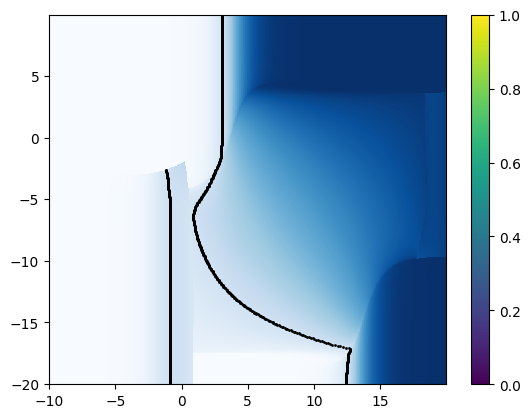

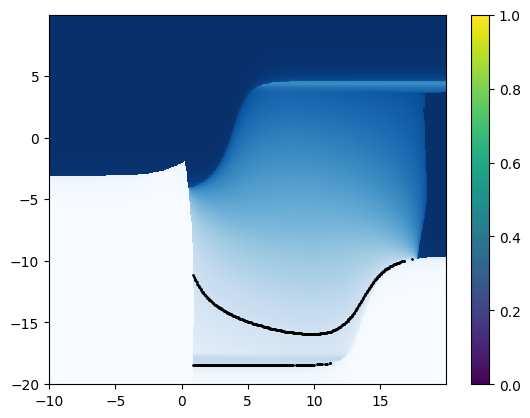

In [ ]:
# tune the tolerance to make sure we get all the points
# this old functionality WAS nice because we could selectively exclude bifurcations that straddle the target, and not just assume
#   interpolation like the funciton does
# but it turns out that this "straddling" is an important phenomenon anyway, so eh

# tolerance = 0.025

# test1 = nullcline('par1',0.2,avgs,tolerance=tolerance)

# plt.pcolormesh(par1res,par2res,avgs[:,:,0],cmap="Blues")
# plt.colorbar(
# plt.scatter(test1[:,0],test1[:,1],color='k',s=1))
# plt.show()

# test2 = nullcline('par2',0.2,avgs,tolerance=tolerance)

# plt.pcolormesh(par1res,par2res,avgs[:,:,2],cmap="Blues")
# plt.colorbar()
# plt.scatter(test2[:,0],test2[:,1],color='k',s=1)
# plt.show()


[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[87]
[88]
[89]
[90]
[91]
[92]
[93]
[94]
[95]
[96]
[97]
[98]
[99]
[100]
[101]
[102]
[103]
[104]
[105]
[106]
[107]
[108]
[109]
[110]
[111]
[112]
[113]
[114]
[115]
[116]
[117]
[118]
[119]
[120]
[121]
[122]
[123]
[124]
[125]
[126]
[127]
[128]
[129]
[130]
[131]
[132]
[133]
[134]
[135]
[136]
[137]
[138]
[139]
[140]
[141]
[142]
[143]
[144]
[145]
[146]
[147]
[148]
[149]
[150]
[151]
[152]
[153]
[154]
[155]
[156]
[157]
[158]
[159]
[160]
[161]
[162]
[163]
[164]
[165]
[166]
[167]
[168]
[169]
[170]
[171]
[172]
[173]
[174]
[175]
[176]
[177]
[178]
[179]
[180]
[181]
[182]
[183]
[184]
[185

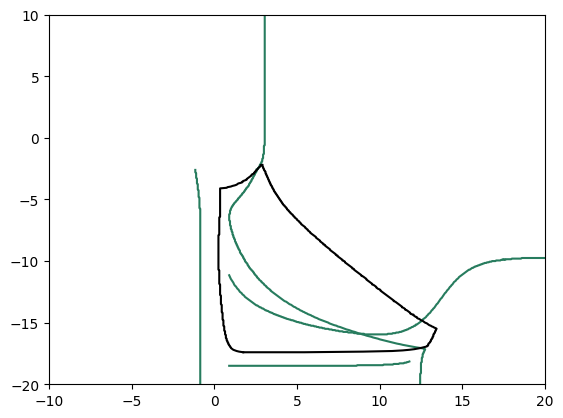

In [ ]:
#tune the line separator to make the points plot smoothly
# lineseparator = 1.5

# plt.xlim(par1min,par1max)
# plt.ylim(par2min,par2max)
# # plt.pcolormesh(par1res,par2res,avgs[:,:,0],cmap="Blues")
# plot_nullcline('par1',.2,avgs,viridian,tolerance,lineseparator)
# # plt.plot(test[:,0],test[:,1],color='k')
# # plt.colorbar()
# # plt.scatter(test1[:,0],test1[:,1],color=viridian,s=1)
# # plot_outline(19,'black',True)
# # plt.show()
# # plt.pcolormesh(par1res,par2res,avgs[:,:,2],cmap="Blues")
# plot_nullcline('par2',.2,avgs,viridian,tolerance,lineseparator)
# # plt.colorbar()
# # plt.scatter(test2[:,0],test2[:,1],color=viridian,s=1)
# plot_outline(19,'black',True)
# plt.show()

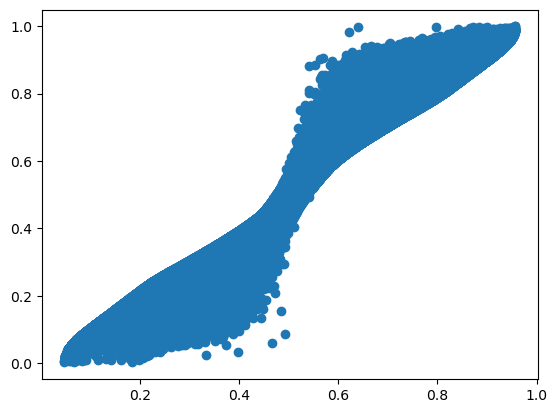

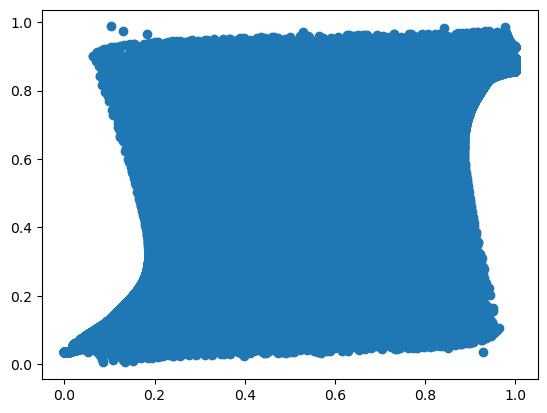

In [48]:
#TESTING THE HYPOTHESIS THAT TIMING CORRELATES WITH AVERAGES IN A SYSTEMATIC WAY
avgs,dutycycles = get_avg_slice(19,slicetype='newrho')

avg1 = avgs[:,:,0]
avg3 = avgs[:,:,0]
dc1 = dutycycles[:,:,0]
dc3 = dutycycles[:,:,2]
avg1 = avg1[np.where(dc1>0)]
avg3 = avg3[np.where(dc3>0)]
dc1 = dc1[dc1>0]
dc3 = dc3[dc3>0]

plt.scatter(avg1,dc1)
plt.show()
plt.scatter(avg3,dc3)
plt.show()

Conclusion: it can but it doesn't always. The time a circuit spends above/below the 0.5 threshold can be counterbalanced by considering just *how* far above or below it is. It probably does occur more often than chance, however, and when it is well-correlated, this can be helpful to HP

In this individual (19), LP's average is highly correlated to its duty cycle (where duty cycle is defined), but not PD's

Therefore, it should be easy to target not only pyloric solutions, but well-timed solutions with respect to LP. PD timing may be harder, but the cycles with well-timed LP might also tend to have well-timed PD. In this way, even having one neuron that is a good indicator of timing can be enough to keep timing in the whole circuit

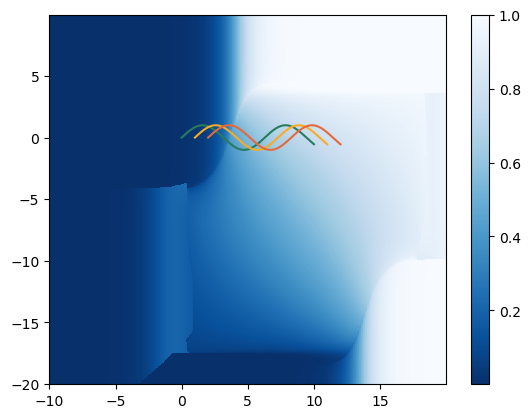

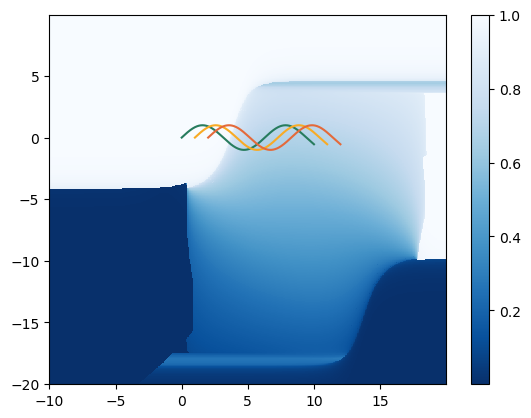

In [47]:
#testing color contrast, I think
x = np.linspace(0,10,1000)
y = np.sin(x)
plt.pcolormesh(par1res,par2res,avgs[:,:,0],cmap="Blues_r")
plt.plot(x,y,color=viridian)
plt.plot(x+1,y,color=xanthous)
plt.plot(x+2,y,color=flame)
plt.colorbar()
plt.show()
plt.pcolormesh(par1res,par2res,avgs[:,:,2],cmap="Blues_r")
plt.plot(x,y,color=viridian)
plt.plot(x+1,y,color=xanthous)
plt.plot(x+2,y,color=flame)
plt.colorbar()
plt.show()

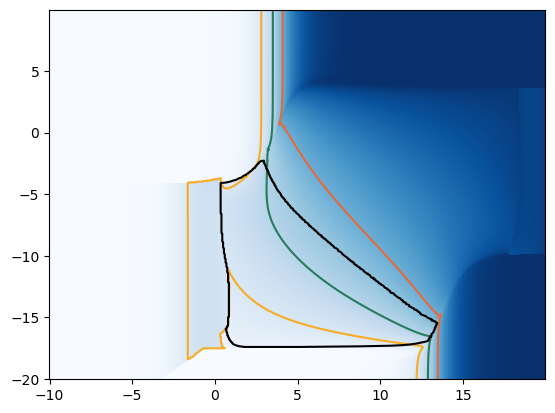

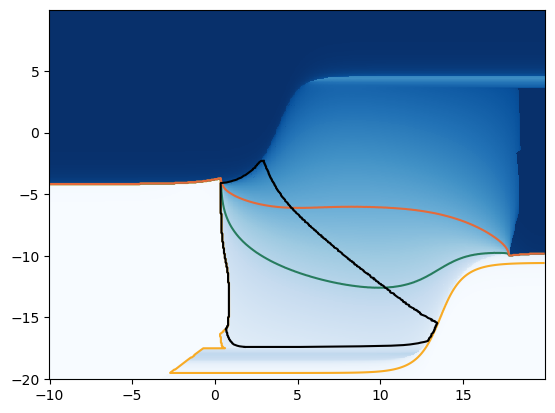

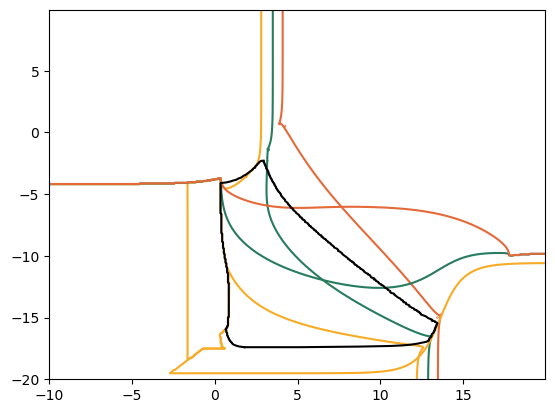

In [10]:
# plt.xticks(np.linspace(par1min,par1max,num=7,endpoint=True))
# plt.yticks(np.linspace(par2min,par2max,num=7,endpoint=True))
plt.pcolormesh(par1res,par2res,avgs[:,:,0],cmap="Blues")
plt.contour(par1res,par2res,avgs[:,:,0],levels=[.15,.3,.5],colors=[xanthous,viridian,flame])
plot_outline(19,'black',True)
plt.show()
plt.pcolormesh(par1res,par2res,avgs[:,:,2],cmap="Blues")
plt.contour(par1res,par2res,avgs[:,:,2],levels=[.03,.3,.5],colors=[xanthous,viridian,flame])
plot_outline(19,'black',True)
plt.show()
plt.contour(par1res,par2res,avgs[:,:,0],levels=[.15,.3,.5],colors=[xanthous,viridian,flame])
plt.contour(par1res,par2res,avgs[:,:,2],levels=[.03,.3,.5],colors=[xanthous,viridian,flame])
plot_outline(19,'black',True)
plt.show()

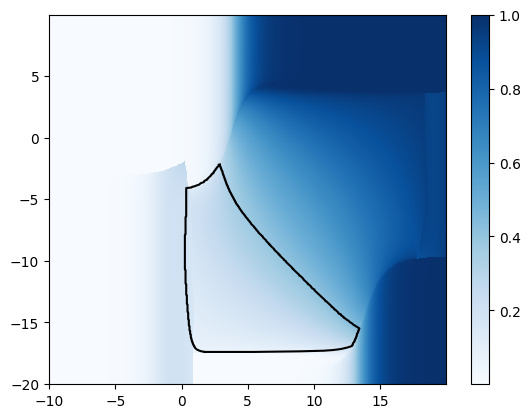

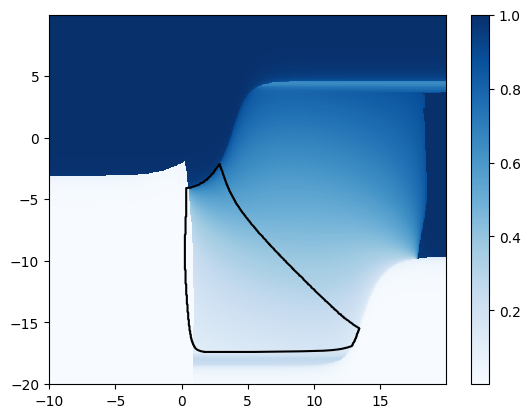

In [ ]:
#demonstration of the multistability situation in individual 19 (DO NOT RUN CELL):
#some of the limit cycles on the left side of this pyloric region are pyloric, but coexist with a static point and don't normally show up
for i in range(19,20):
    # avgs,multistability = get_avg_slice(i,multistability_check=True) #DO NOT UNCOMMENT PYTHON IS THE ONLY PLACE THIS DATA EXISTS
    # outline = get_pyloric_outline(i,True)
    plt.pcolormesh(par1res,par2res,avgs[:,:,0],cmap="Blues")
    # plt.scatter(circuitB1,circuitB3,color='white')
    plot_outline(i,'black',True)
    plt.colorbar()
    plt.show()
    plt.pcolormesh(par1res,par2res,avgs[:,:,2],cmap="Blues")
    # plt.scatter(circuitB1,circuitB3,color='white')
    plot_outline(i,'black',True)
    plt.colorbar()
    plt.show()

In [108]:
def uniquevals(avgs,pyloricslice,stability_test=True,include_unstable=False,tolerance = 0.01,high_res = True,evaluate = False,plot=True,pyl_sampling_prop=1,nonpyl_sampling_prop=1,alphaval=.5,ax=None,progress=False):
    avgs_swap = np.swapaxes(avgs,0,1)
    if stability_test:
        stability = np.zeros_like(avgs[:,:,0])
        for i in range(1,len(avgs)-1):
            for j in range(1,len(avgs[0])-1):
                if ((avgs_swap[i-1,j,0]<avgs_swap[i,j,0])and(avgs_swap[i,j,0]<avgs_swap[i+1,j,0])):
                    if ((avgs_swap[i,j-1,2]<avgs_swap[i,j,2])and(avgs_swap[i,j,2]<avgs_swap[i,j+1,2])):
                        stability[i,j] = 1
    else:
        stability = np.ones_like(avgs[:,:,0])
    stability = np.swapaxes(stability,0,1)
    
    pyloricavgs = avgs[pyloricslice>=.3][:,0::2]
    stable_pyloricavgs = avgs[(pyloricslice>=.3) & (stability==1)][:,0::2]
    unstable_pyloricavgs = avgs[(pyloricslice>=.3) & (stability==0)][:,0::2]
    nonpyloricavgs = avgs[pyloricslice<.3][:,0::2]
    stable_nonpyloricavgs = avgs[(pyloricslice<.3) & (stability == 1)][:,0::2]
    unstable_nonpyloricavgs = avgs[(pyloricslice<.3) & (stability==0)][:,0::2]

    if progress:
        print(len(stable_pyloricavgs),len(stable_nonpyloricavgs),len(unstable_pyloricavgs),len(unstable_nonpyloricavgs))

    if plot and (ax==None):
        plt.xlim(0,1)
        plt.ylim(0,1)
        stable_pyloricavgs = stable_pyloricavgs[np.random.choice(range(len(stable_pyloricavgs)),len(stable_pyloricavgs),replace=False)]
        stable_nonpyloricavgs = stable_nonpyloricavgs[np.random.choice(range(len(stable_nonpyloricavgs)),len(stable_nonpyloricavgs),replace=False)]
        if progress:
            print(len(stable_pyloricavgs[:int(pyl_sampling_prop*len(stable_nonpyloricavgs))]),len(stable_nonpyloricavgs[:int(nonpyl_sampling_prop*len(unstable_nonpyloricavgs))]))
        if include_unstable:
            unstable_pyloricavgs = unstable_pyloricavgs[np.random.choice(range(len(unstable_pyloricavgs)),len(unstable_pyloricavgs),replace=False)]
            unstable_nonpyloricavgs = unstable_nonpyloricavgs[np.random.choice(range(len(unstable_nonpyloricavgs)),len(unstable_nonpyloricavgs),replace=False)]
            plt.scatter(unstable_nonpyloricavgs[:int(nonpyl_sampling_prop*len(unstable_nonpyloricavgs)),0],unstable_nonpyloricavgs[:int(nonpyl_sampling_prop*len(unstable_nonpyloricavgs)),1],color='crimson',alpha=alphaval,s=1) #change marker
            plt.scatter(unstable_pyloricavgs[:int(pyl_sampling_prop*len(unstable_pyloricavgs)),0],unstable_pyloricavgs[:int(pyl_sampling_prop*len(unstable_pyloricavgs)),1],color='darkgreen',alpha=alphaval,s=1)
        plt.scatter(stable_nonpyloricavgs[:int(nonpyl_sampling_prop*len(stable_nonpyloricavgs)),0],stable_nonpyloricavgs[:int(nonpyl_sampling_prop*len(stable_nonpyloricavgs)),1],color='crimson',alpha=alphaval,s=1)
        plt.scatter(stable_pyloricavgs[:int(pyl_sampling_prop*len(stable_pyloricavgs)),0],stable_pyloricavgs[:int(pyl_sampling_prop*len(stable_pyloricavgs)),1],color='limegreen',alpha=alphaval,s=1)
        plt.show()
    elif plot:
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        if len(stable_pyloricavgs)>0:
            stable_pyloricavgs = stable_pyloricavgs[np.random.choice(range(len(stable_pyloricavgs)),len(stable_pyloricavgs),replace=False)]
        stable_nonpyloricavgs = stable_nonpyloricavgs[np.random.choice(range(len(stable_nonpyloricavgs)),len(stable_nonpyloricavgs),replace=False)]
        if progress:
            print(len(stable_pyloricavgs[:int(pyl_sampling_prop*len(stable_nonpyloricavgs))]),len(stable_nonpyloricavgs[:int(nonpyl_sampling_prop*len(unstable_nonpyloricavgs))]))
        if include_unstable:
            unstable_pyloricavgs = unstable_pyloricavgs[np.random.choice(range(len(unstable_pyloricavgs)),len(unstable_pyloricavgs),replace=False)]
            unstable_nonpyloricavgs = unstable_nonpyloricavgs[np.random.choice(range(len(unstable_nonpyloricavgs)),len(unstable_nonpyloricavgs),replace=False)]
            ax.scatter(unstable_nonpyloricavgs[:int(nonpyl_sampling_prop*len(unstable_nonpyloricavgs)),0],unstable_nonpyloricavgs[:int(nonpyl_sampling_prop*len(unstable_nonpyloricavgs)),1],color='crimson',alpha=alphaval,s=1) #change marker
            ax.scatter(unstable_pyloricavgs[:int(pyl_sampling_prop*len(unstable_pyloricavgs)),0],unstable_pyloricavgs[:int(pyl_sampling_prop*len(unstable_pyloricavgs)),1],color='darkgreen',alpha=alphaval,s=1)
        ax.scatter(stable_nonpyloricavgs[:int(nonpyl_sampling_prop*len(stable_nonpyloricavgs)),0],stable_nonpyloricavgs[:int(nonpyl_sampling_prop*len(stable_nonpyloricavgs)),1],color='crimson',alpha=alphaval,s=1)
        ax.scatter(stable_pyloricavgs[:int(pyl_sampling_prop*len(stable_pyloricavgs)),0],stable_pyloricavgs[:int(pyl_sampling_prop*len(stable_pyloricavgs)),1],color='limegreen',alpha=alphaval,s=1)

    if evaluate:
        solvable = False
        if include_unstable == True:
            pyloric_consideration = pyloricavgs
            nonpyloric_consideration = nonpyloricavgs
        else:
            pyloric_consideration = stable_pyloricavgs
            nonpyloric_consideration = stable_nonpyloricavgs
    
        elimination_pyl_list = np.copy(pyloric_consideration)

        while len(elimination_pyl_list>0):
            pyl_pt = elimination_pyl_list[0]
            dists_pyl = np.linalg.norm(nonpyloric_consideration-pyl_pt,axis=1)
            if np.min(dists_pyl)>tolerance:
                solvable = True
                if progress:
                    print(pyl_pt,nonpyloric_consideration[np.where(dists_pyl==np.min(dists_pyl))],np.min(dists_pyl))
                break
            else:
                nonpyl_pt = nonpyloric_consideration[np.where(dists_pyl==np.min(dists_pyl))[0][0]]
                dists_nonpyl = np.linalg.norm(elimination_pyl_list-nonpyl_pt,axis=1)
                elimination_pyl_list = elimination_pyl_list[dists_nonpyl>tolerance]
                if progress:
                    print(len(elimination_pyl_list))
        return solvable
    else:
        return
    
#just the stability part of the uniquevals function
def teststability(avgs,pyloricslice,indiv):
    avgs_swap = np.swapaxes(avgs,0,1)
    stability = np.zeros_like(avgs[:,:,0])
    for i in range(1,len(avgs)-1):
        for j in range(1,len(avgs[0])-1):
            if ((avgs_swap[i-1,j,0]<avgs_swap[i,j,0])and(avgs_swap[i,j,0]<avgs_swap[i+1,j,0])):
                if ((avgs_swap[i,j-1,2]<avgs_swap[i,j,2])and(avgs_swap[i,j,2]<avgs_swap[i,j+1,2])):
                    stability[i,j] = 1
    stability = np.swapaxes(stability,0,1)
    stable_pyloricavgs = avgs[(pyloricslice>=.3) & (stability==1)][:,0::2]
    unstable_pyloricavgs = avgs[(pyloricslice>=.3) & (stability==0)][:,0::2]
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.scatter(stable_pyloricavgs[:,0],stable_pyloricavgs[:,-1],c='g',s=1,alpha=.05)
    plt.scatter(unstable_pyloricavgs[:,0],unstable_pyloricavgs[:,-1],c='gray',s=1,alpha=.02)
    plt.show()
    plt.pcolormesh(par1res,par2res,stability)
    plot_outline(indiv,'b')
    plt.show()
    return

metapar1res = np.arange(0,1,0.01)
metapar2res = np.arange(0,1,0.01)

#function to transform the averages point cloud into a more readable form
def avgs_density(avgs,pyloricslice,gridsize):
    gridres = np.arange(0,1+gridsize,gridsize)
    plotgridres = gridres[:-1]
    densitygrid = np.zeros((len(gridres)-1,len(gridres)-1))
    pyloricavgs = avgs[np.where(pyloricslice>=.3)][:,0::2]
    nonpyloricavgs = avgs[np.where(pyloricslice<.3)][:,0::2]

    for i in range(len(gridres)-1):
        for j in range(len(gridres)-1):
            pyloric_mask = (pyloricavgs[:,0]>=gridres[i])&(pyloricavgs[:,0]<gridres[i+1])&(pyloricavgs[:,1]>=gridres[j])&(pyloricavgs[:,1]<gridres[j+1])
            nonpyloric_mask = (nonpyloricavgs[:,0]>=gridres[i])&(nonpyloricavgs[:,0]<gridres[i+1])&(nonpyloricavgs[:,1]>=gridres[j])&(nonpyloricavgs[:,1]<gridres[j+1])
            if len(np.where(nonpyloric_mask)[0])>0:
                if len(np.where(pyloric_mask)[0])>0:
                    densitygrid[i,j] = 1
                else:
                    densitygrid[i,j] = .5
            elif len(np.where(pyloric_mask)[0])>0:
                densitygrid[i,j] = 1.5
            else:
                densitygrid[i,j] = 0
    return plotgridres, densitygrid.T

#image the point cloud and HP metaparameter space side by side
def sidebyside(avgs,pyloricslice,hpparslice,include_unstable,plot_density,LB1s=[],LB3s=[],pyl_sampling_prop = 1,nonpyl_sampling_prop = 1,progress=False,alphaval=0.5):
    if plot_density:
        f, axes = plt.subplots(1, 3, sharey=False,figsize=(10,5))
    else:
        f, axes = plt.subplots(1, 2, sharey=False,figsize=(10,5))
    for ax in axes:
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        
    solvability = uniquevals(avgs,pyloricslice,plot=True,ax=axes[0],include_unstable=include_unstable,pyl_sampling_prop=pyl_sampling_prop,nonpyl_sampling_prop=nonpyl_sampling_prop,evaluate=True,progress=progress,alphaval=alphaval)
    axes[0].scatter(LB1s,LB3s,color='k',s=10)
    if plot_density:
        plot_grid,density = avgs_density(avgs,pyloricslice,.005)
        if np.max(density) == 1.5:
            colormap = mcolors.ListedColormap([french_gray,flame,xanthous,viridian])
        elif np.max(density) == 1:
            colormap = mcolors.ListedColormap([french_gray,flame,xanthous])
        else:
            colormap = mcolors.ListedColormap([french_gray,flame])
        axes[1].pcolormesh(plot_grid,plot_grid,density,cmap=colormap)
        
    im = axes[-1].pcolormesh(metapar1res,metapar2res,hpparslice,cmap="RdYlGn",vmax=25)
    axes[-1].scatter(LB1s,LB3s,color='k',s=10)
    cbar_ax = f.add_axes([0.95, 0.15, 0.03, 0.7])
    plt.colorbar(im,cax=cbar_ax)

    return solvability

In [55]:
#Get avg and pyloric slices for individual of interest
indiv = 99
pyloricslice = get_pyloric_slice(indiv,high_res=True)
avgslice = get_avg_slice(indiv,'high_res')


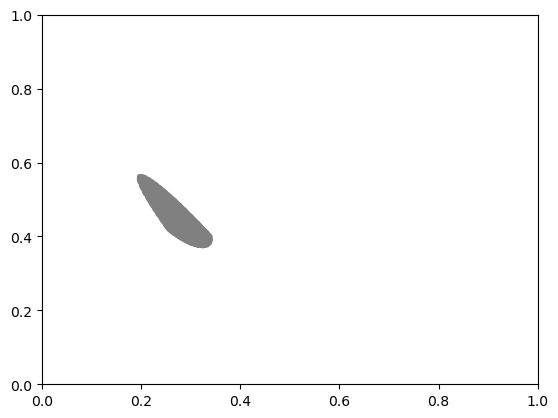

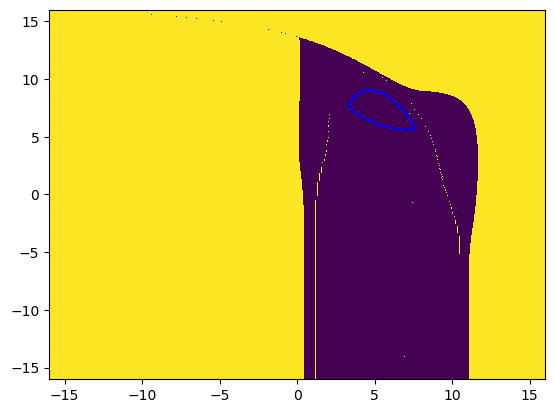

In [108]:
teststability(avgslice,pyloricslice,18)

In [ ]:
#unfortunately, there are no direct examples where regulation WOULD work if not for instability, only examples where it would be mixed
#but instead is bad
for i in range(36,100):
    solvable = uniquevals(i,include_unstable=True,evaluate=True,plot=False)
    if solvable:
        stable_solvable = uniquevals(i,include_unstable=False,evaluate=True,plot=False)
        print(i, " done")
        if stable_solvable != solvable:
            print(i, ' made unsolvable by instability')

In [48]:
solvables = np.zeros(100)
for i in range(100):
    solvables[i] = uniquevals(i,evaluate=True,plot=False)
    print(i,' solvable?: ', solvables[i])

0  solvable?:  1.0
1  solvable?:  1.0
2  solvable?:  0.0
3  solvable?:  1.0
4  solvable?:  1.0
5  solvable?:  1.0
6  solvable?:  1.0
7  solvable?:  1.0
8  solvable?:  1.0
9  solvable?:  0.0
10  solvable?:  1.0
11  solvable?:  0.0
12  solvable?:  1.0
13  solvable?:  1.0
14  solvable?:  1.0
15  solvable?:  0.0
16  solvable?:  0.0
17  solvable?:  1.0
18  solvable?:  0.0
19  solvable?:  1.0
20  solvable?:  0.0
21  solvable?:  1.0
22  solvable?:  1.0
23  solvable?:  1.0
24  solvable?:  1.0
25  solvable?:  1.0
26  solvable?:  0.0
27  solvable?:  1.0
28  solvable?:  0.0
29  solvable?:  1.0
30  solvable?:  1.0
31  solvable?:  1.0
32  solvable?:  1.0
33  solvable?:  1.0
34  solvable?:  0.0
35  solvable?:  1.0
36  solvable?:  1.0
37  solvable?:  1.0
38  solvable?:  1.0
39  solvable?:  0.0
40  solvable?:  1.0
41  solvable?:  1.0
42  solvable?:  1.0
43  solvable?:  1.0
44  solvable?:  0.0
45  solvable?:  1.0
46  solvable?:  1.0
47  solvable?:  1.0
48  solvable?:  1.0
49  solvable?:  1.0
50  solvab

In [51]:
unsolvables = np.where(solvables==0)[0]
print(unsolvables)

[ 2  9 11 15 16 18 20 26 28 34 39 44 59 64 70 76 81 95]


Now to ask whether this list of unsolvable planes corresponds with HP difficulty (we already know we will discover some unstable through this process)

Unsolvable with HP evolutions (no HP was perfect in the plane):

[ 2  6  9 11 15 16 18 20 24 26 28 29 34 36 39 44 48 59 64 69 70 75 76 78
 80 81 82 85 90 95]

In [54]:
HP_unsolvables = [ 2 , 6 , 9, 11, 15, 16, 18, 20, 24, 26, 28, 29, 34, 36, 39, 44, 48, 59, 64, 69, 70, 75, 76, 78,
 80, 81, 82, 85, 90, 95]
unrealized = np.setdiff1d(HP_unsolvables,unsolvables)
print(unrealized) #theoretically solvable, but weren't solved with HP

[ 6 24 29 36 48 69 75 78 80 82 85 90]


So, the ones that are theoretically solvable but weren't solved with HP are:

6,24,29,36,48,69,75,78,80,82,85,90

What about if we raise our standards for theoretically solvable (increase threshold for "far enough away")?

In [61]:
solvables_stricter = np.zeros(100)
for i in range(100):
    solvables_stricter[i] = uniquevals(i,tolerance=0.05,evaluate=True,plot=False)
    print(i,' solvable?: ', solvables[i])
# print(solvables_stricter)

0  solvable?:  1.0
1  solvable?:  1.0
2  solvable?:  0.0
3  solvable?:  1.0
4  solvable?:  1.0
5  solvable?:  1.0
6  solvable?:  1.0
7  solvable?:  1.0
8  solvable?:  1.0
9  solvable?:  0.0
10  solvable?:  1.0
11  solvable?:  0.0
12  solvable?:  1.0
13  solvable?:  1.0
14  solvable?:  1.0
15  solvable?:  0.0
16  solvable?:  0.0
17  solvable?:  1.0
18  solvable?:  0.0
19  solvable?:  1.0
20  solvable?:  0.0
21  solvable?:  1.0
22  solvable?:  1.0
23  solvable?:  1.0
24  solvable?:  1.0
25  solvable?:  1.0
26  solvable?:  0.0
27  solvable?:  1.0
28  solvable?:  0.0
29  solvable?:  1.0
30  solvable?:  1.0
31  solvable?:  1.0
32  solvable?:  1.0
33  solvable?:  1.0
34  solvable?:  0.0
35  solvable?:  1.0
36  solvable?:  1.0
37  solvable?:  1.0
38  solvable?:  1.0
39  solvable?:  0.0
40  solvable?:  1.0
41  solvable?:  1.0
42  solvable?:  1.0
43  solvable?:  1.0
44  solvable?:  0.0
45  solvable?:  1.0
46  solvable?:  1.0
47  solvable?:  1.0
48  solvable?:  1.0
49  solvable?:  1.0
50  solvab

In [65]:
unsolvables_stricter = np.where(solvables_stricter==0)[0]
print(unsolvables)
print(unsolvables_stricter)

[ 2  9 11 15 16 18 20 26 28 34 39 44 59 64 70 76 81 95]
[ 2  6  9 11 15 16 18 20 26 28 29 31 34 39 44 59 64 69 70 75 76 80 81 90
 95]


In [66]:
almost_unsolvable = np.setdiff1d(unsolvables_stricter,unsolvables)
unrealized_stricter = np.setdiff1d(HP_unsolvables,unsolvables_stricter)
print(almost_unsolvable)
print(unrealized_stricter)

[ 6 29 31 69 75 80 90]
[24 36 48 78 82 85]


True

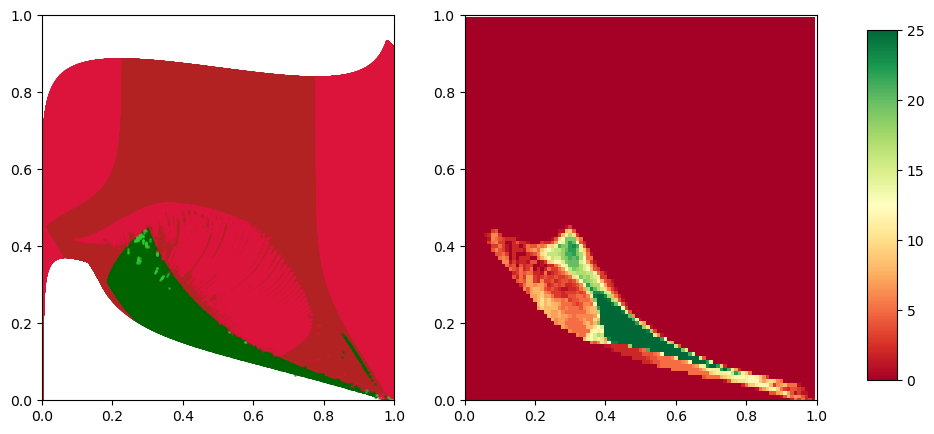

In [60]:
#individual 36 is an example where the method "works" but the pictures do not look the same, probably due to long timescale limit cycles
avgs= get_avg_slice(36,'high_res')
pyloric=get_pyloric_slice(36,True)
hpparslice = np.loadtxt('./Specifically Evolved HP Mechanisms/Every Circuit/36/HPparslice_newrho_res5.dat').swapaxes(0,1)
sidebyside(avgs,pyloric,hpparslice,include_unstable=True,plot_density=False)

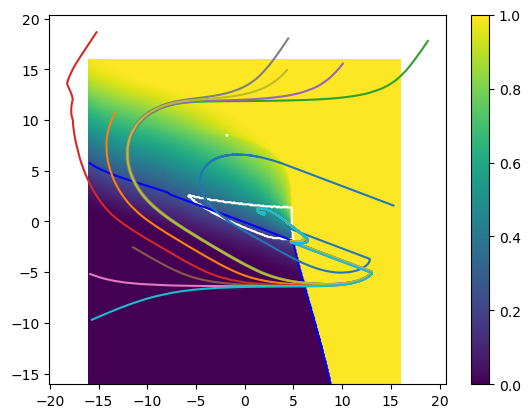

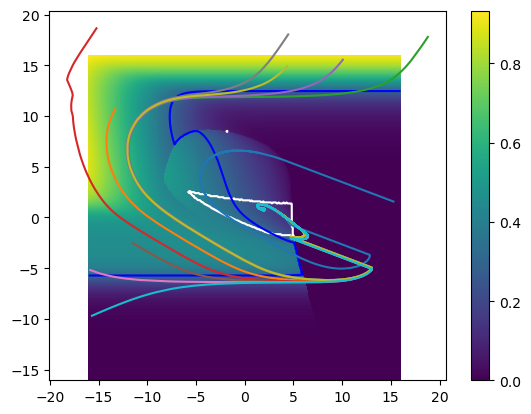

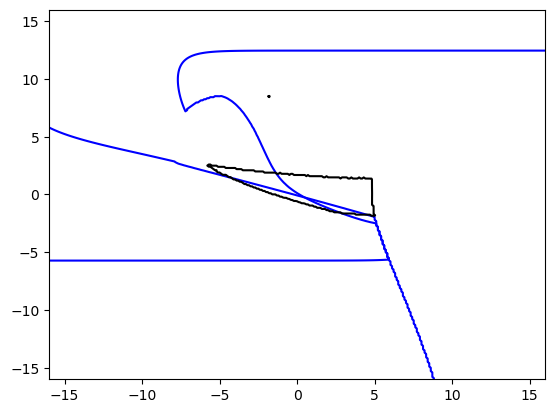

In [331]:
i = 36
lb1 = .25
lb3 = .3
avgs = get_avg_slice(i)
plt.pcolormesh(par1res,par2res,avgs[:,:,0])
plt.colorbar()
plot_outline(i,'w')
plt.contour(par1res,par2res,avgs[:,:,0],levels=[lb1],colors=['blue'])
for j in range(len(traj)):
    plt.plot(traj[j,:,0],traj[j,:,1])
plt.show()
plt.pcolormesh(par1res,par2res,avgs[:,:,2])
plt.colorbar()
plot_outline(i,'w')
plt.contour(par1res,par2res,avgs[:,:,2],levels=[lb3],colors=['blue'])
for j in range(len(traj)):
    plt.plot(traj[j,:,0],traj[j,:,1])
plt.show()
plt.contour(par1res,par2res,avgs[:,:,2],levels=[lb3],colors=['blue'])
plt.contour(par1res,par2res,avgs[:,:,0],levels=[lb1],colors=['blue'])
plot_outline(i,'k')
plt.show()

178 180 168 170


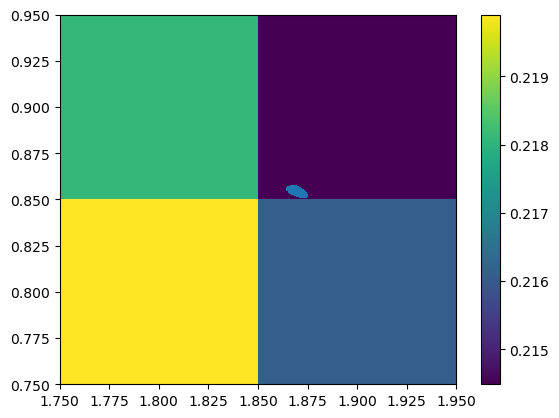

In [ ]:
#demonstration of why instability judgement is subject to the sampling resolution
n1l = np.where(par1res.round(2)==1.8)[0][0]
n1u = np.where(par1res.round(2)==1.9)[0][0]+1
n3l = np.where(par2res.round(2)==.8)[0][0]
n3u = np.where(par2res.round(2)==.9)[0][0]+1
print(n1l,n1u,n3l,n3u)

plt.pcolormesh(par1res[n1l:n1u],par2res[n3l:n3u],avgs[n1l:n1u,n3l:n3u,2])
plt.plot(traj[0,-1000000:,0],traj[0,-1000000:,1])
plt.colorbar()

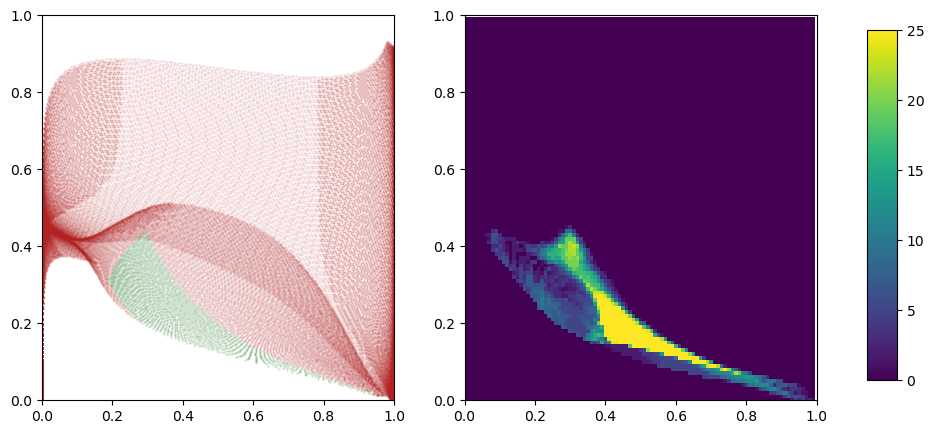

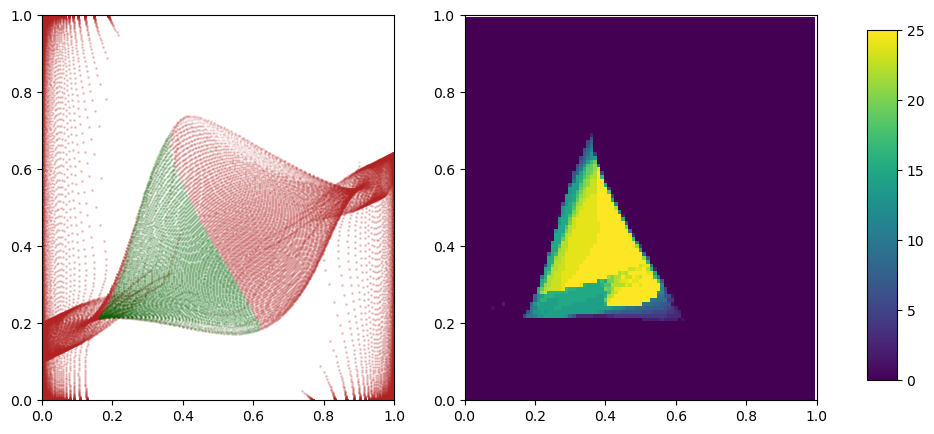

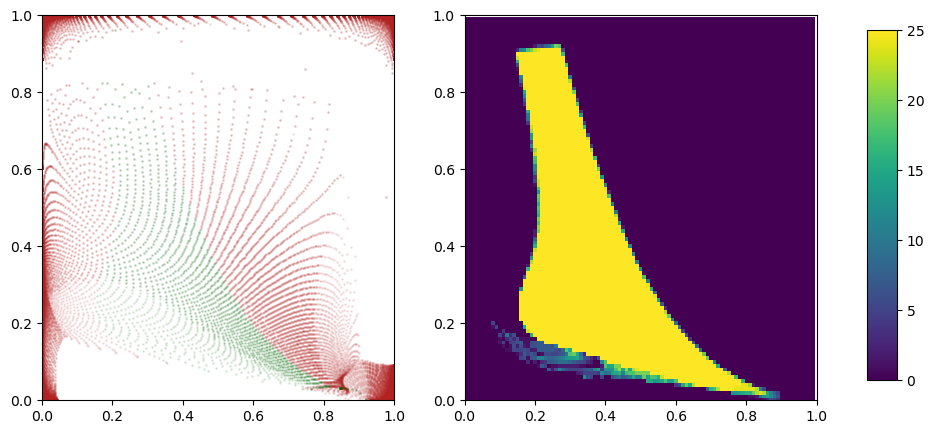

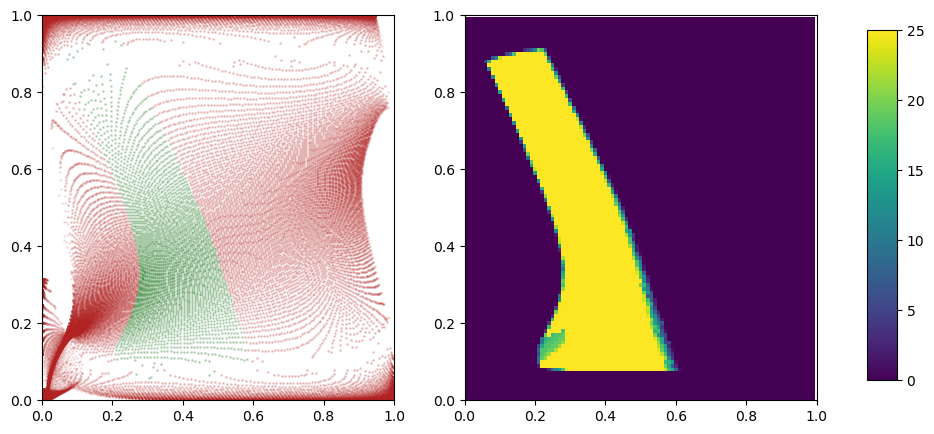

In [289]:
for i in [36,78,91,92]:
    sidebyside(i)

Once the HP parspace is updated for every circuit, print every circuit's:

- theoretical solvability at default threshold = 0.03
- best evolved recovery number (out of 121)
- best zero range recovery number (out of 25)

In [3]:
recovery = np.zeros((100,5,121,5))
final_recovery = np.zeros_like(recovery[:,:,:,0])
evolved_pyl_recovery = np.zeros((100,5))
zerorange_pyl_recovery = np.zeros((100))
for i in range(100):
    for j in range(5):
        # print(np.loadtxt("./Specifically Evolved HP mechanisms/Every Circuit/%s/%s/recoverytest.dat"%(i,j))[:,2:])
        recovery[i,j] = np.loadtxt("./Specifically Evolved HP mechanisms/Every Circuit/%s/%s/recoverytest.dat"%(i,j))[:,2:]
        final_recovery[i,j] = recovery[i,j,:,-1]
        evolved_pyl_recovery[i,j] = np.sum(final_recovery[i,j]>=.3)
    hpparslice = np.loadtxt('./Specifically Evolved HP Mechanisms/Every Circuit/%s/HPparslice_newrho_res5.dat'%i).T
    zerorange_pyl_recovery[i] = np.max(hpparslice)


In [11]:
potential_unstables = np.where(np.max(evolved_pyl_recovery,axis=1)==0)[0]
print(potential_unstables)
print(zerorange_pyl_recovery[potential_unstables])

[ 2 11 18 20 24 44 64 69 75]
[20. 25.  9. 15. 14. 14. 20. 24. 19.]


In [17]:
a = np.zeros((2,2))
a[0,0] = 1
b = np.zeros((2,2))
b[1,1] = 1
print(np.all(a[np.where(b>0)[0]]==0))

True


In [32]:
fully_solvable  = np.where(zerorange_pyl_recovery==25)[0]
# print(fully_solvable)
k = 0
for i in fully_solvable:
    hpparslice1 = np.loadtxt('./Specifically Evolved HP Mechanisms/Every Circuit/%s/HPparslice_newrho_res5.dat'%i).T
    for j in np.delete(fully_solvable,k):
        # print(i,j)
        hpparslice2 = np.loadtxt('./Specifically Evolved HP Mechanisms/Every Circuit/%s/HPparslice_newrho_res5.dat'%j).T
        hpparslicesum = hpparslice1 + hpparslice2
        maxsolved = np.max(hpparslicesum)
        if maxsolved<35:
            print(i,j,":",maxsolved)
    k += 1


11 15 : 25.0
11 29 : 28.0
11 70 : 32.0
15 11 : 25.0
15 59 : 25.0
15 82 : 26.0
29 11 : 28.0
29 59 : 25.0
36 70 : 33.0
36 93 : 29.0
59 15 : 25.0
59 29 : 25.0
59 70 : 32.0
59 93 : 31.0
70 11 : 32.0
70 36 : 33.0
70 59 : 32.0
82 15 : 26.0
93 36 : 29.0
93 59 : 31.0


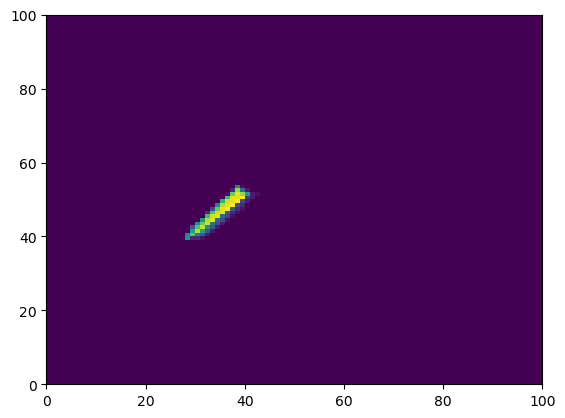

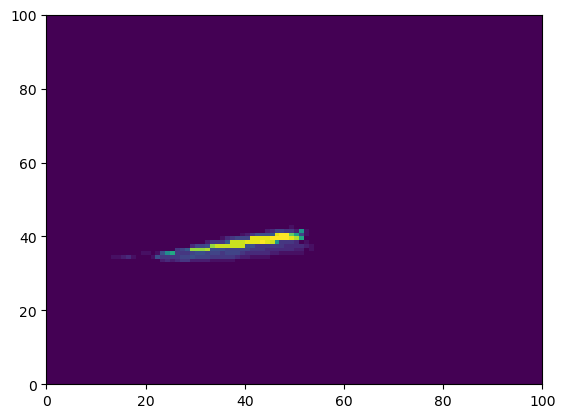

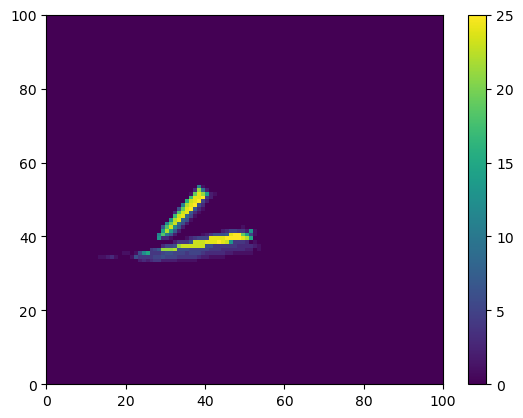

In [ ]:
#identify two individuals that could each be solved separately, but not by the same HP mechanism
hpparslice1 = np.loadtxt('./Specifically Evolved HP Mechanisms/Every Circuit/%s/HPparslice_newrho_res5.dat'%15).T
hpparslice2 = np.loadtxt('./Specifically Evolved HP Mechanisms/Every Circuit/%s/HPparslice_newrho_res5.dat'%59).T
hpparslicesum = hpparslice1+hpparslice2
plt.pcolormesh(hpparslice1)
plt.show()
plt.pcolormesh(hpparslice2)
plt.show()
plt.pcolormesh(hpparslicesum)
plt.colorbar()
plt.show()

In [ ]:
for i in range(77):
    print(i)
    solvability = uniquevals(i,evaluate=True,plot=False)
    print("Solvable: ", solvability)
    print("Evolved solutions: ", np.max(evolved_pyl_recovery[i]))
    print("Zero Range Solutions: ", zerorange_pyl_recovery[i])

0
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
1
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
2
Solvable:  False
Evolved solutions:  0.0
Zero Range Solutions:  20.0
3
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
4
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
5
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
6
Solvable:  True
Evolved solutions:  78.0
Zero Range Solutions:  25.0
7
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
8
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
9
Solvable:  False
Evolved solutions:  46.0
Zero Range Solutions:  13.0
10
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
11
Solvable:  False
Evolved solutions:  0.0
Zero Range Solutions:  25.0
12
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
13
Solvable:  True
Evolved solutions:  121.0
Zero Range Solution

In [223]:
for i in range(77,100):
    print(i)
    solvability = uniquevals(i,evaluate=True,plot=False)
    print("Solvable: ", solvability)
    print("Evolved solutions: ", np.max(evolved_pyl_recovery[i]))
    print("Zero Range Solutions: ", zerorange_pyl_recovery[i])

77
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
78
Solvable:  True
Evolved solutions:  120.0
Zero Range Solutions:  25.0
79
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
80
Solvable:  False
Evolved solutions:  41.0
Zero Range Solutions:  25.0
81
Solvable:  False
Evolved solutions:  22.0
Zero Range Solutions:  9.0
82
Solvable:  True
Evolved solutions:  119.0
Zero Range Solutions:  25.0
83
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
84
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
85
Solvable:  True
Evolved solutions:  99.0
Zero Range Solutions:  25.0
86
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
87
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
88
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
89
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
90
Solvable:  False
Evolved solutions:  67.0
Zero Ran

In [ ]:
#cases where evolution worked, but the theory predicts that zero range ADHP wouldn't work
# NO EXAMPLES

#hypothesis: evolution found a wider-range solution, which was mandated to avoid a bifurcation trap

In [ ]:
#resolve anomalies where one of the zero-range ADHP mechanisms worked, but it was theoretically impossible:
# individuals 11, 15, 29, 59, 70, 80

#hypothesis: using border conditions as additional stable nullclines

In [ ]:
# anomalies where the plane was theoretically solvable, evolution worked, but zero range solutions didnt
# NO EXAMPLES

In [ ]:
#resolve anomalies where the plane was theoretically solvable, but neither evolution nor zero range solutions worked
# individuals 36,

#hypothesis: unstable nullclines, multistable 

In [216]:
for i in range(93,100):
    print(i)
    solvability = uniquevals(i,evaluate=True,plot=False)
    print("Solvable: ", solvability)
    print("Evolved solutions: ", np.max(evolved_pyl_recovery[i]))
    print("Zero Range Solutions: ", zerorange_pyl_recovery[i])

93
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
94
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
95
Solvable:  False
Evolved solutions:  57.0
Zero Range Solutions:  13.0
96
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
97
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
98
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0
99
Solvable:  True
Evolved solutions:  121.0
Zero Range Solutions:  25.0


In [111]:
indiv = 18
pyloricslice = get_pyloric_slice(indiv,high_res=True)
avgs = get_avg_slice(indiv,slicetype='high_res') #swaps the axes
# hpparslice = np.loadtxt('./Specifically Evolved HP Mechanisms/Every Circuit/%s/HPparslice_newrho_res5.dat'%indiv).T
hpparslice = np.zeros_like(hpparslice)

False

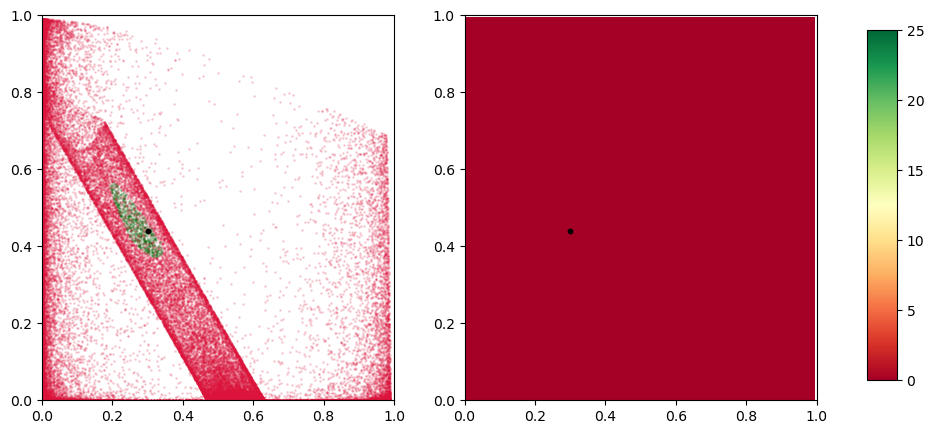

In [112]:
sidebyside(avgs,pyloricslice,hpparslice,True,False,pyl_sampling_prop=0.01,nonpyl_sampling_prop=0.01,progress=False,alphaval=0.15,LB1s=[.3],LB3s=[.44])

In [94]:
def new_HP_contours(avgs,pylslice,LB1,LB3,plot_clean = False):
    if plot_clean:
        num = 3
    else:
        num=2
    f,axes=plt.subplots(1,num,sharey=True,figsize=(15.03,5))
    plt.subplots_adjust(left=0)
    for ax in axes:
        ax.set_xlim(-16,16)
        ax.set_xlim(-16,16)
        ax.set_xticks(np.arange(-16,16.01,4))
        ax.set_yticks(np.arange(-16,16.01,4))
    if plot_clean:
        axes[2].set_facecolor('darkgray')
    im = axes[0].pcolormesh(par1res,par2res,avgs[:,:,0],cmap='Blues_r')
    im2 = axes[1].pcolormesh(par1res,par2res,avgs[:,:,2],cmap='Blues_r')
    cbar_ax = f.add_axes([0.95, 0.15, 0.03, 0.7])
    cbar = plt.colorbar(im,cax=cbar_ax)
    cbar.ax.hlines([.27,.25],-1,1,colors=[LPcolor,PDcolor])
    axes[0].contour(par1res,par2res,avgs[:,:,0],levels=[LB1],colors=LPcolor)
    axes[0].contour(par1res,par2res,avgs[:,:,2],levels=[LB3],colors=PDcolor,linestyles='dotted')
    axes[0].contour(par1res,par2res,pylslice,levels=[.3],colors=['w'],zorder=1,linewidths=1)
    axes[1].contour(par1res,par2res,avgs[:,:,2],levels=[LB3],colors=PDcolor)
    axes[1].contour(par1res,par2res,avgs[:,:,0],levels=[LB1],colors=LPcolor,linestyles='dotted')
    axes[1].contour(par1res,par2res,pylslice,levels=[.3],colors=['w'],zorder=1,linewidths=1)
    if plot_clean:
        axes[2].contour(par1res,par2res,avgs[:,:,0],levels=[LB1],colors=LPcolor)
        axes[2].contour(par1res,par2res,avgs[:,:,2],levels=[LB3],colors=PDcolor)
        axes[2].contour(par1res,par2res,pylslice,levels=[.3],colors=['w'],zorder=1,linewidths=1)

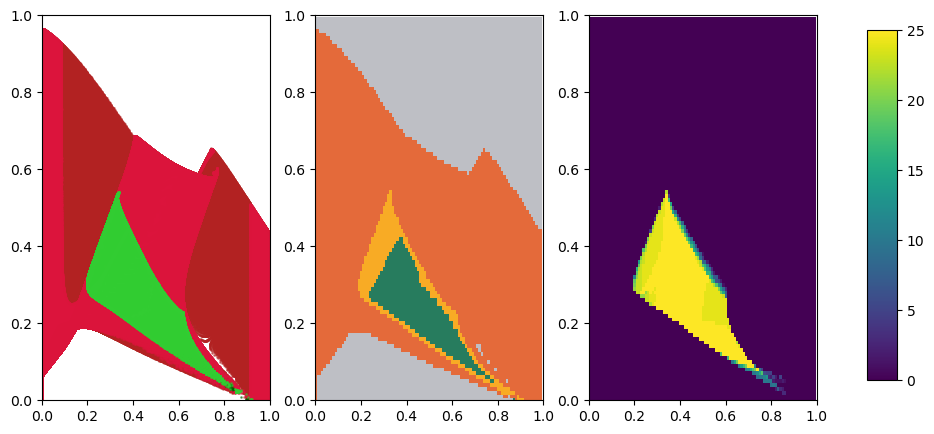

1  solvable?:  True


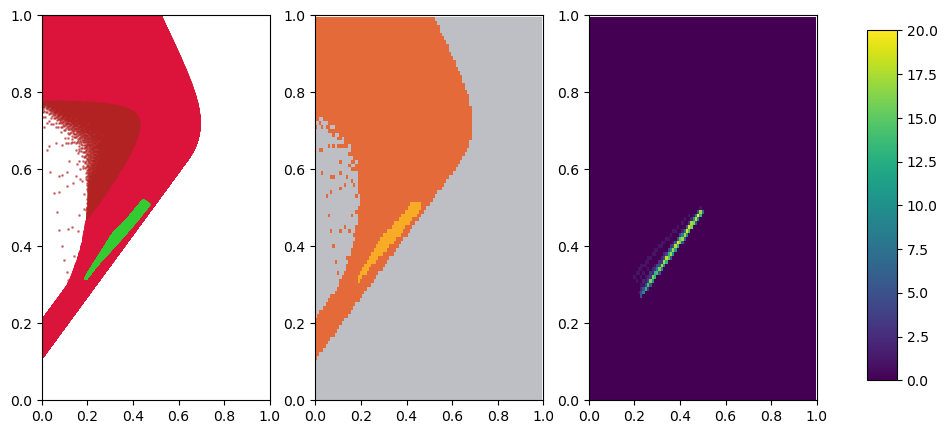

2  solvable?:  False


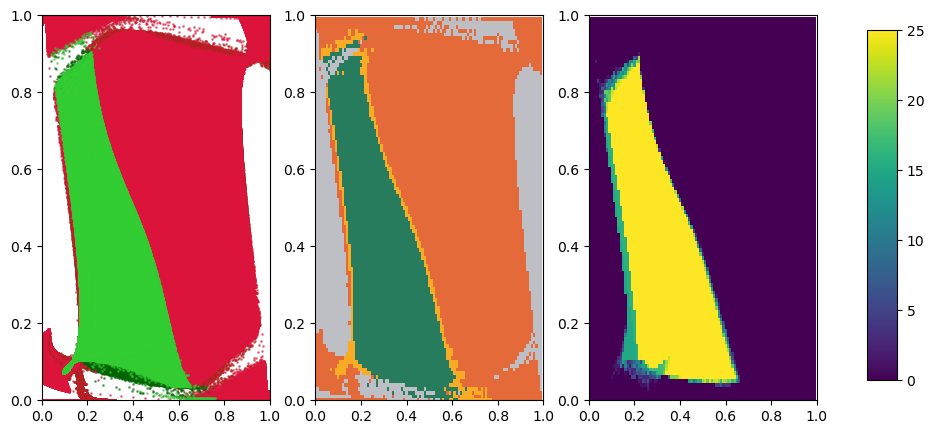

3  solvable?:  True


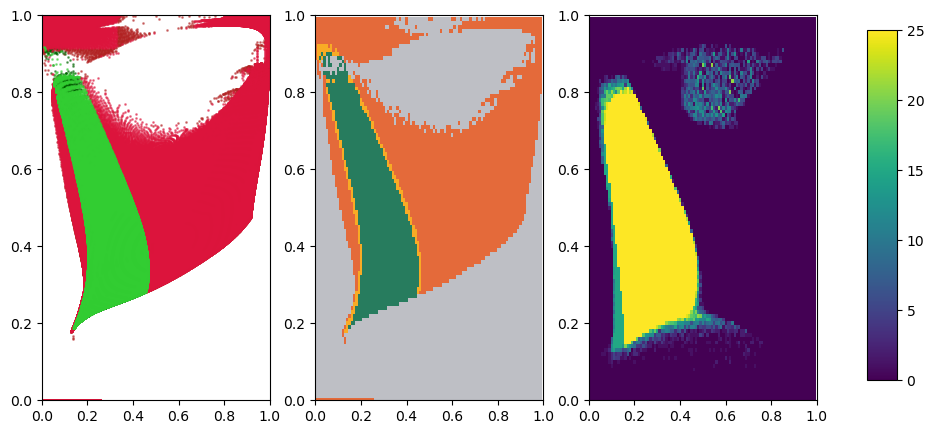

4  solvable?:  True


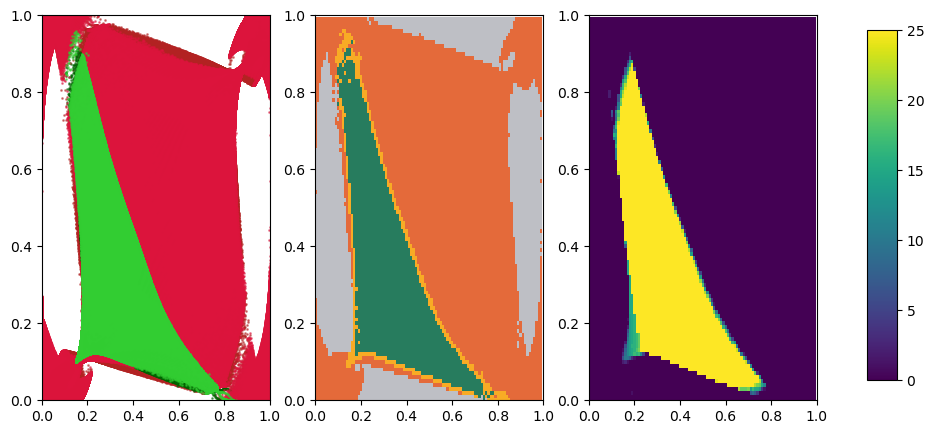

5  solvable?:  True


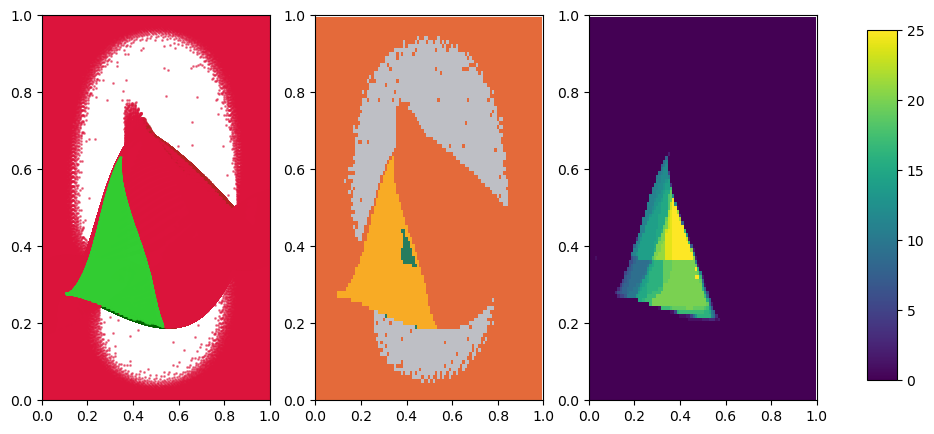

6  solvable?:  True


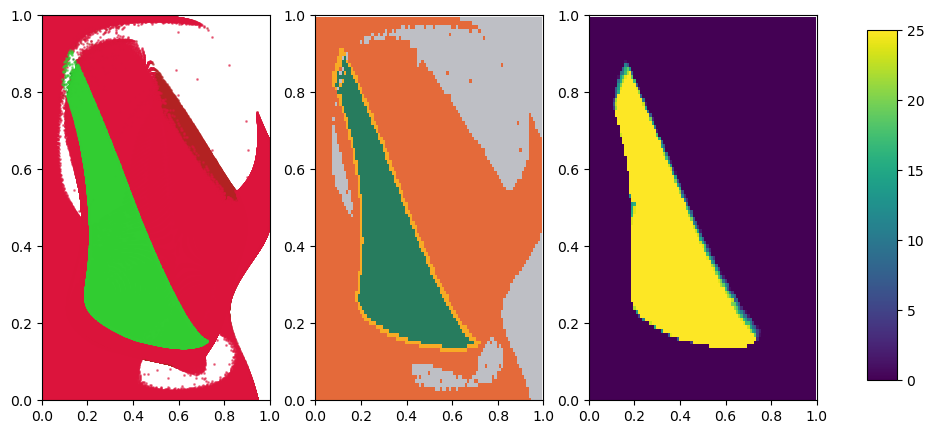

7  solvable?:  True


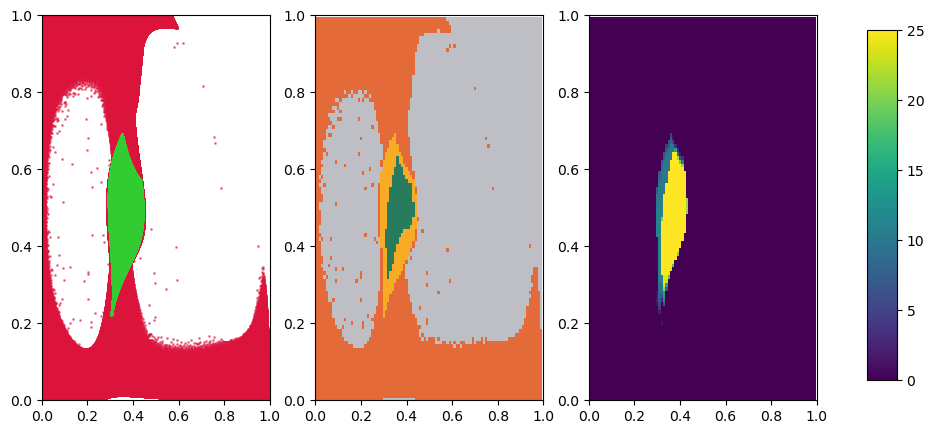

8  solvable?:  True


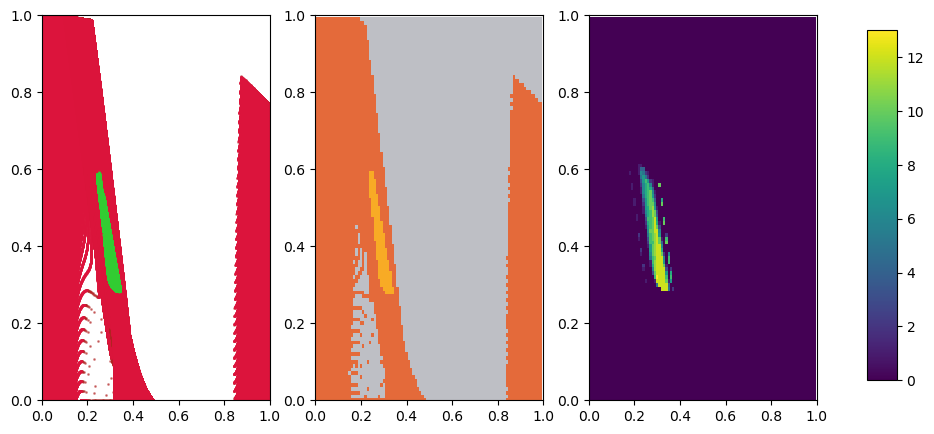

9  solvable?:  False


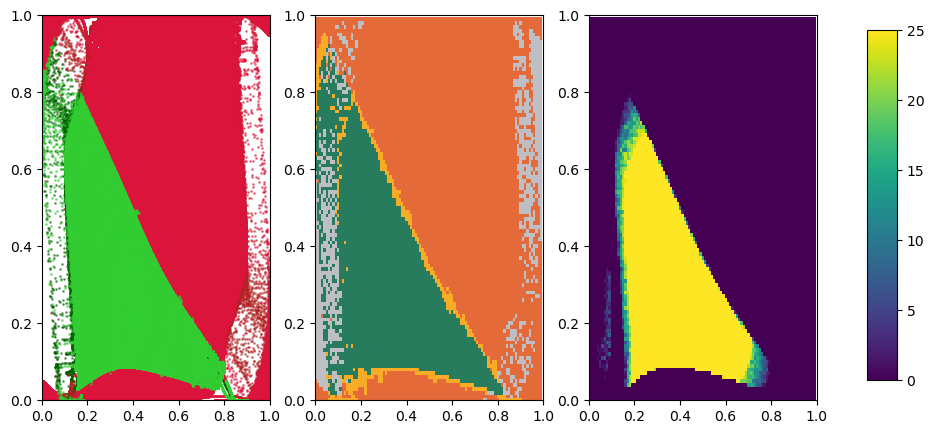

10  solvable?:  True


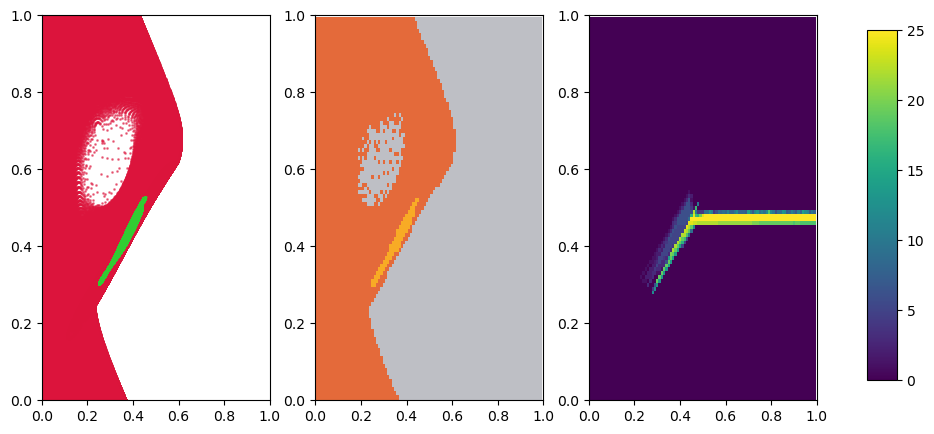

11  solvable?:  False


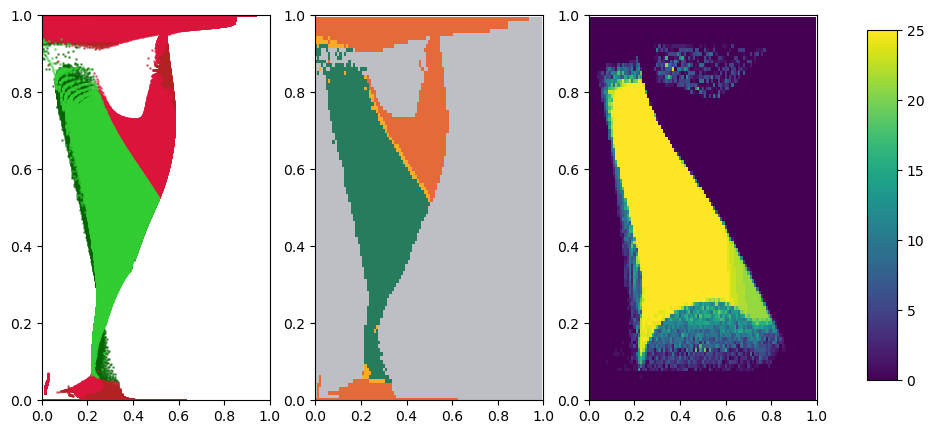

12  solvable?:  True


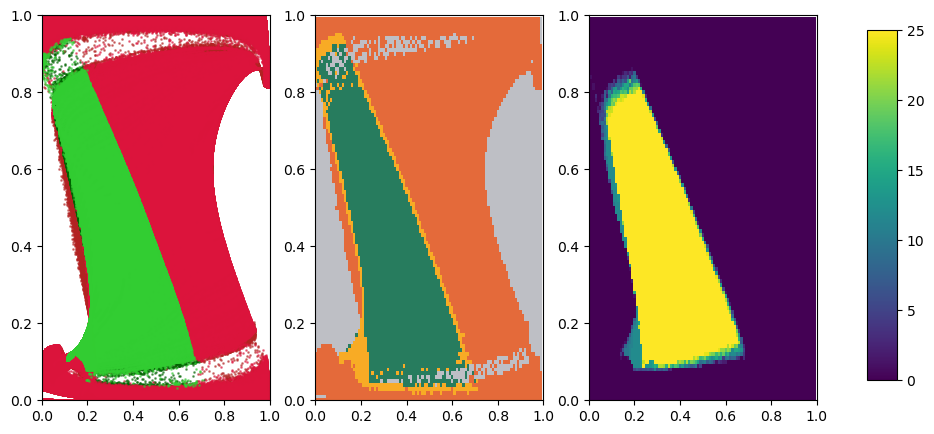

13  solvable?:  True


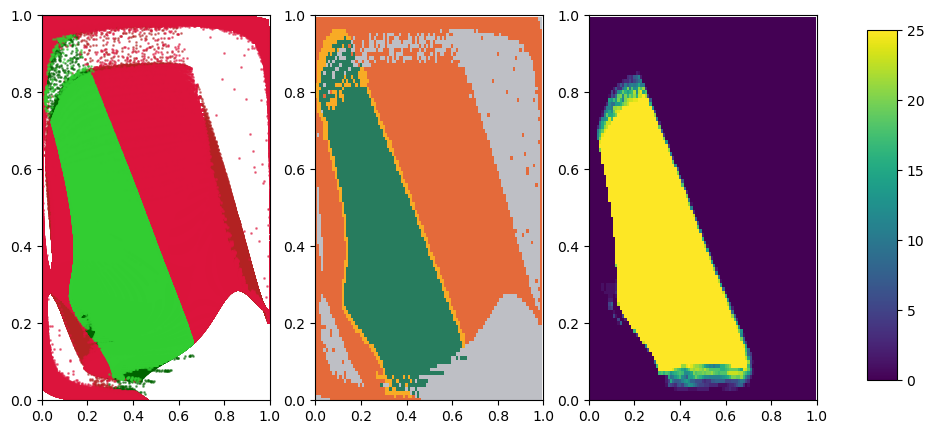

14  solvable?:  True


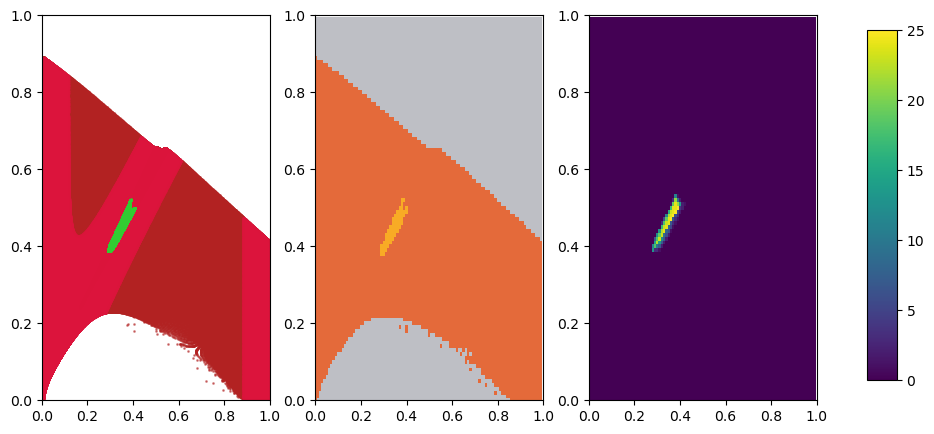

15  solvable?:  False


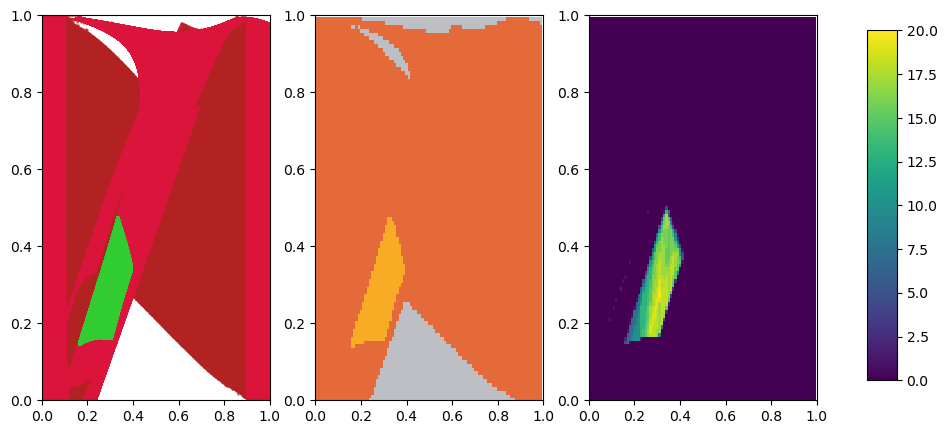

16  solvable?:  False


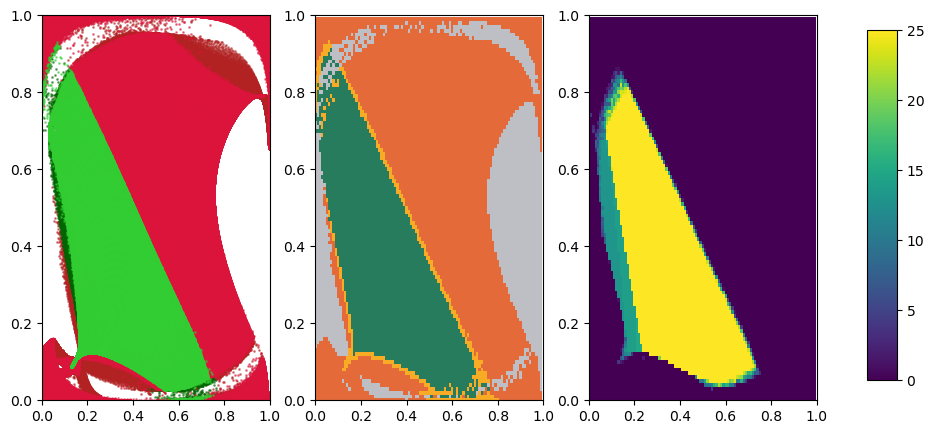

17  solvable?:  True


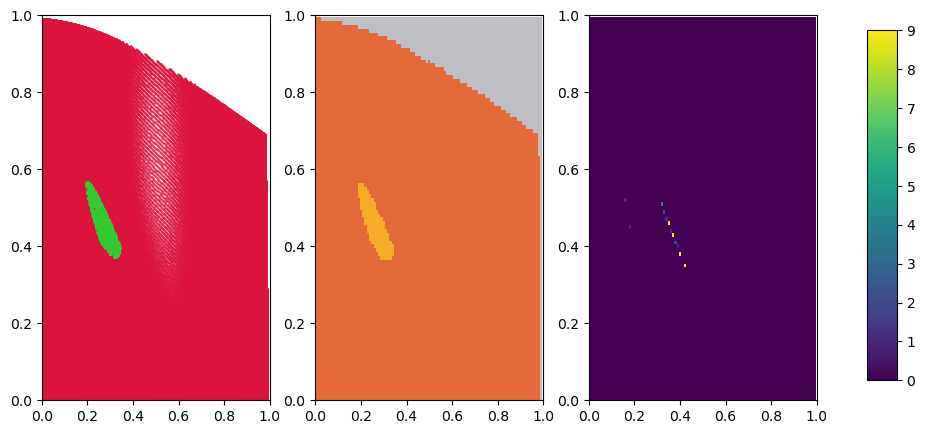

18  solvable?:  False


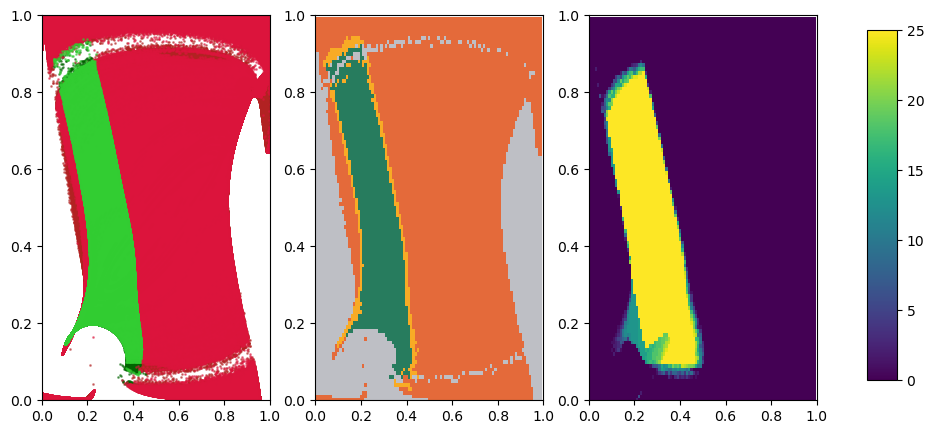

19  solvable?:  True


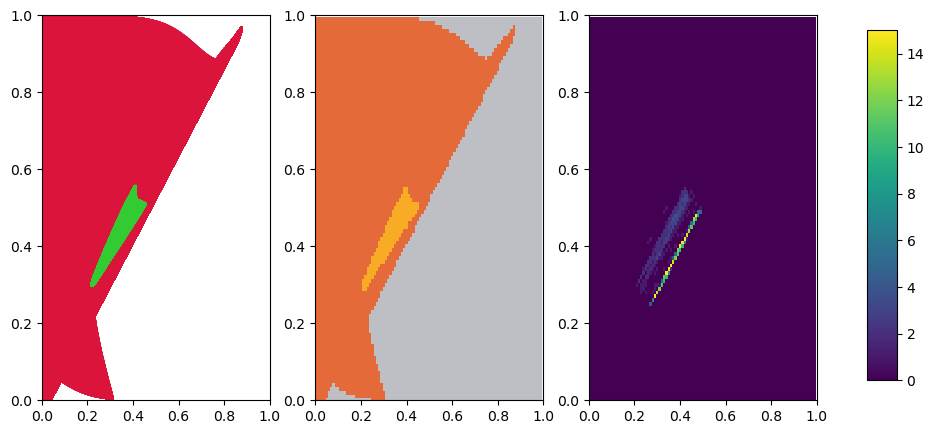

20  solvable?:  False


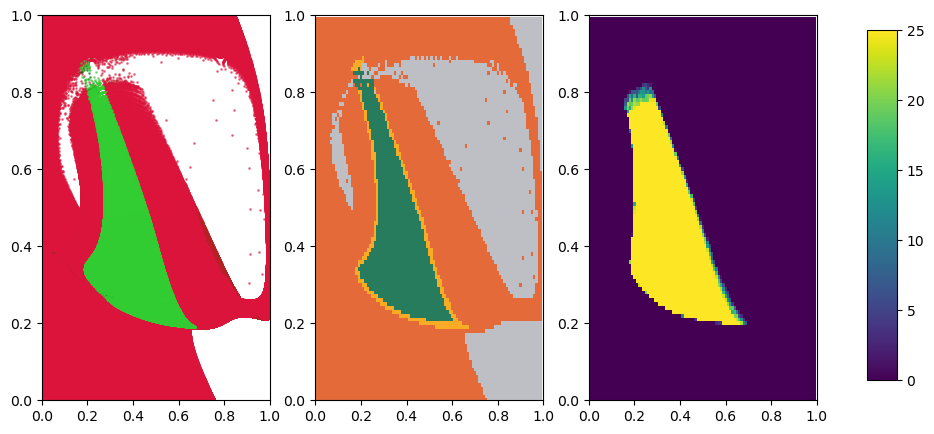

21  solvable?:  True


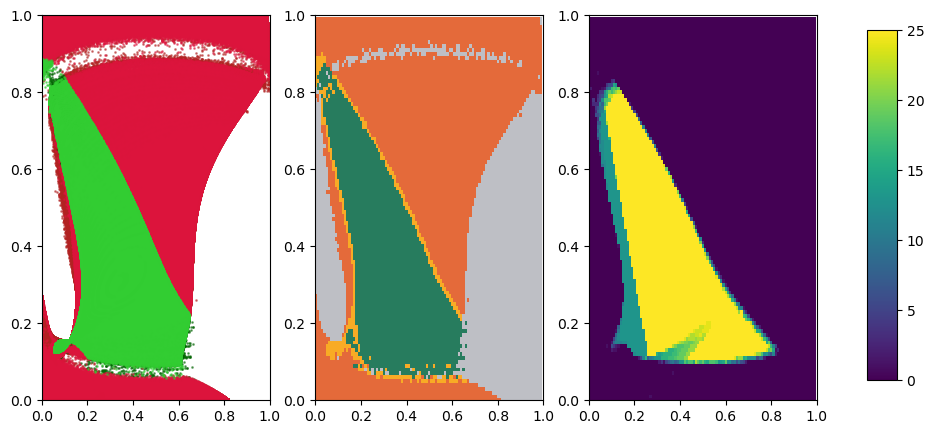

22  solvable?:  True


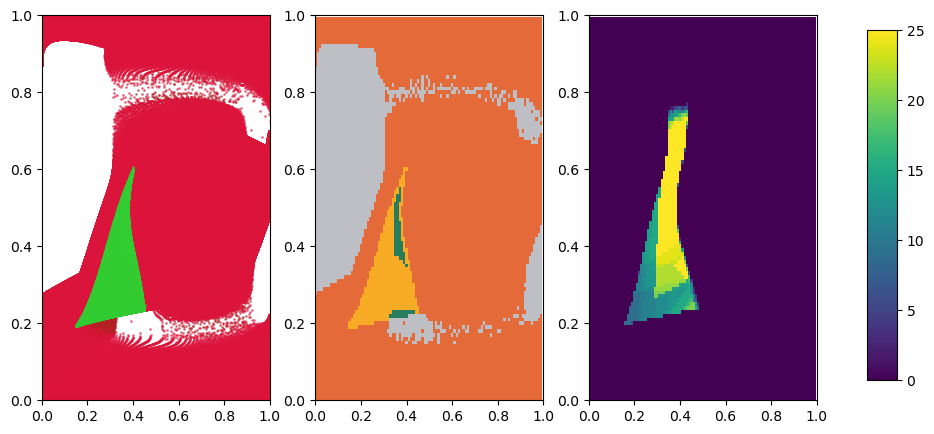

23  solvable?:  True


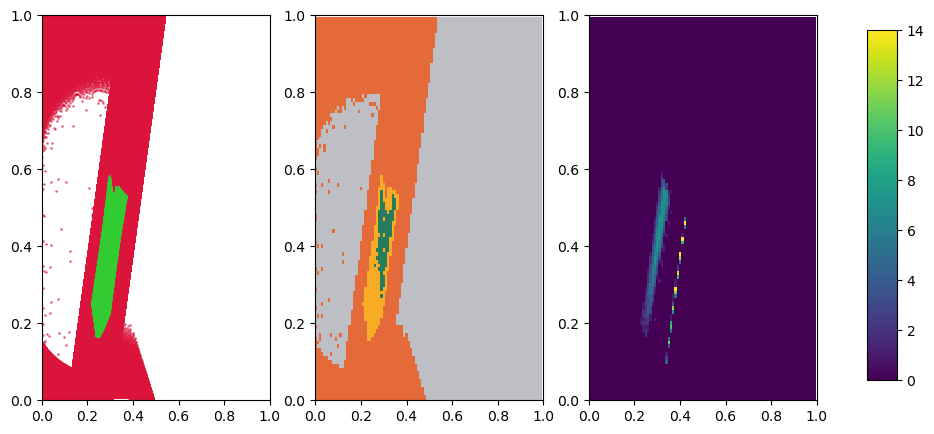

24  solvable?:  True


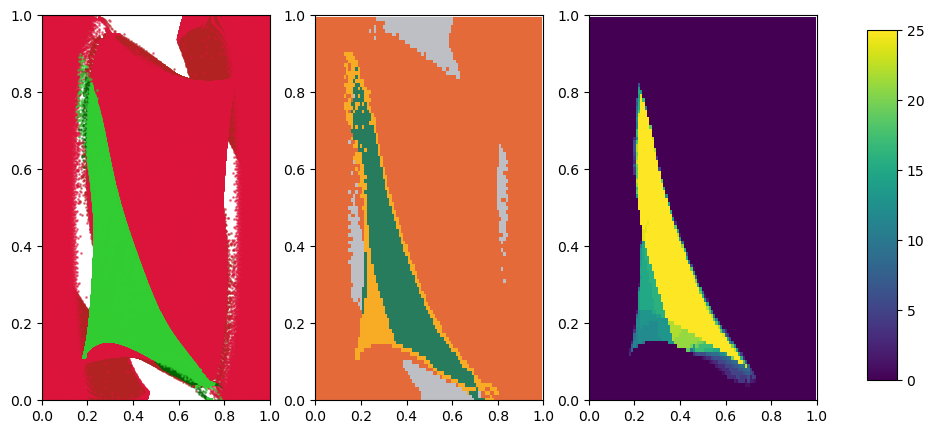

25  solvable?:  True


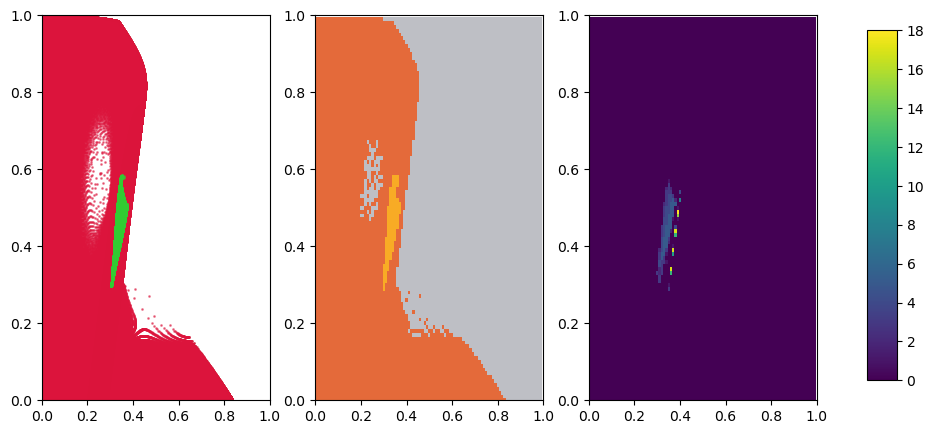

26  solvable?:  False


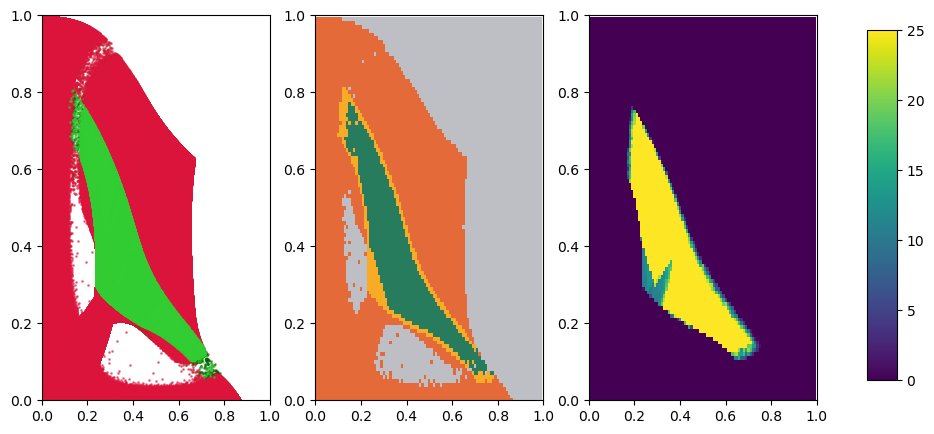

27  solvable?:  True


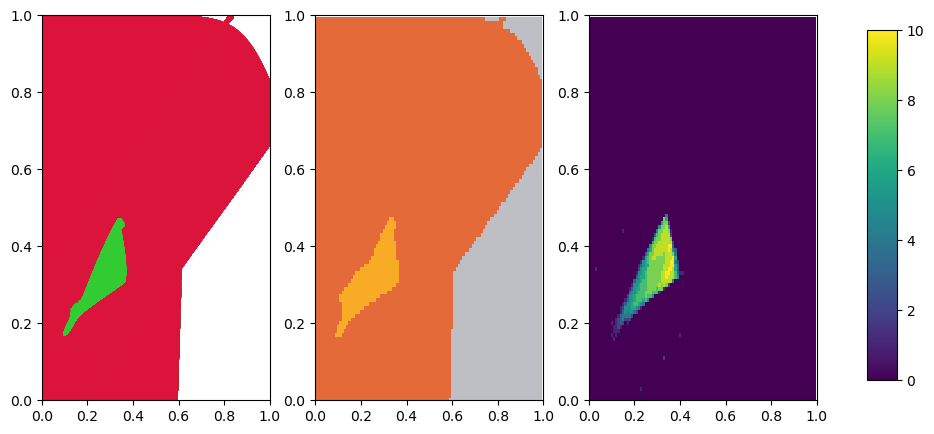

28  solvable?:  False


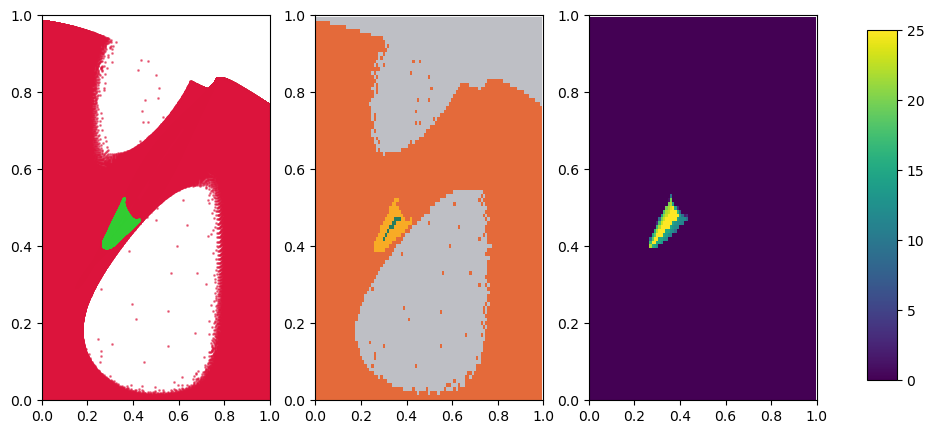

29  solvable?:  True


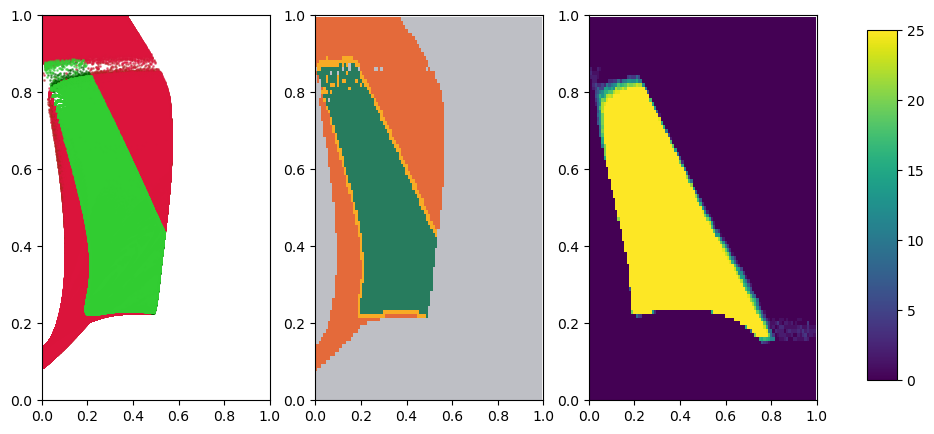

30  solvable?:  True


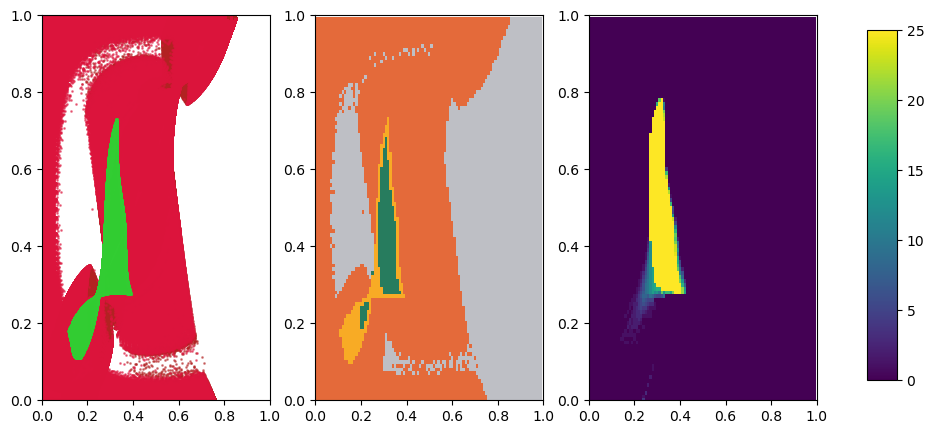

31  solvable?:  True


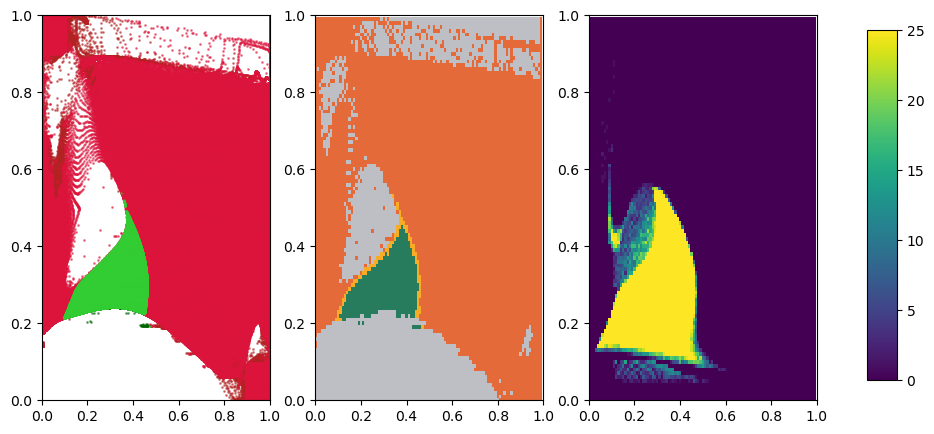

32  solvable?:  True


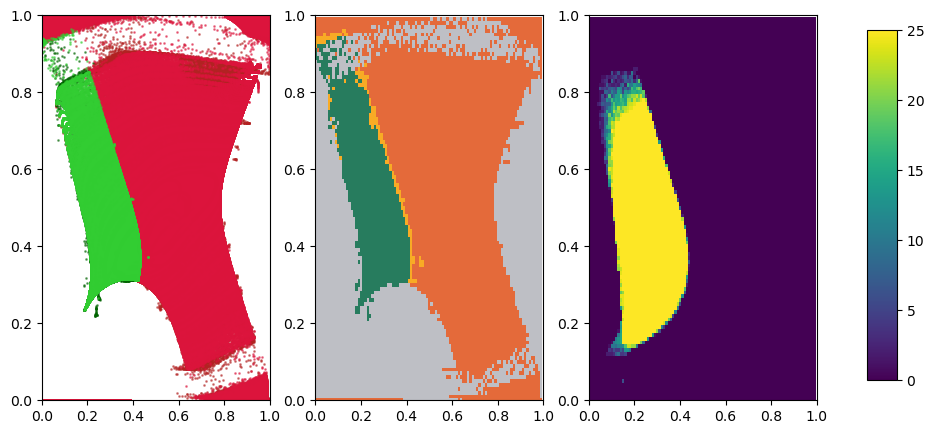

33  solvable?:  True


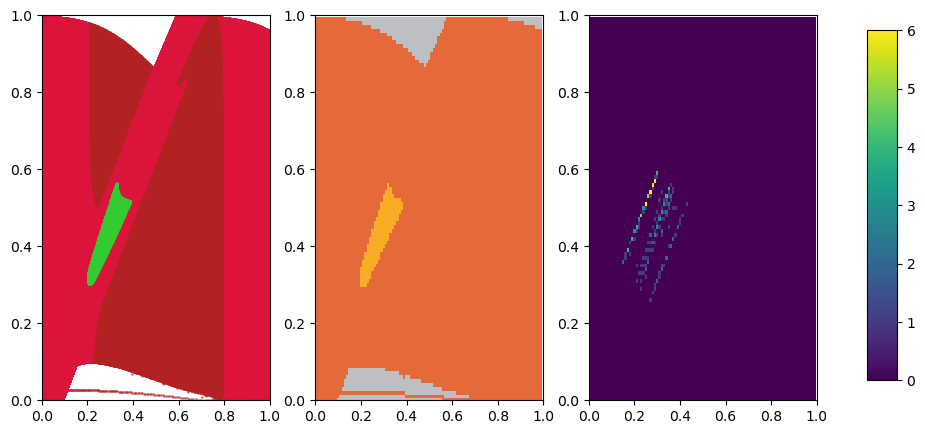

34  solvable?:  False


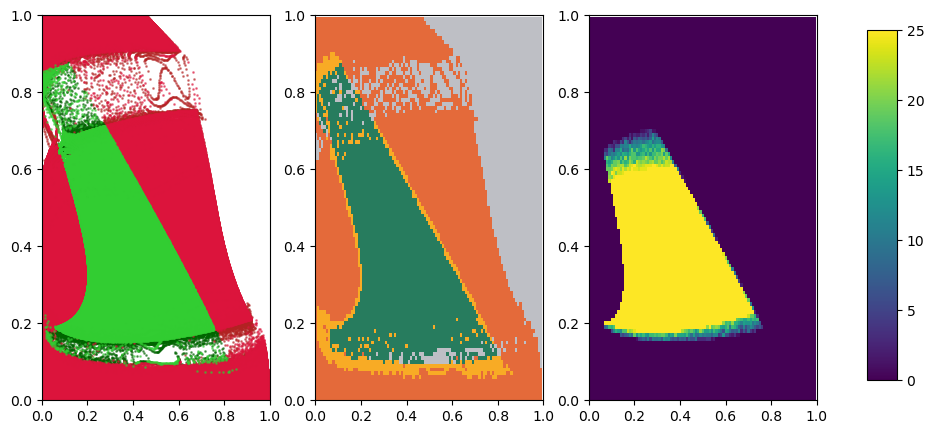

35  solvable?:  True


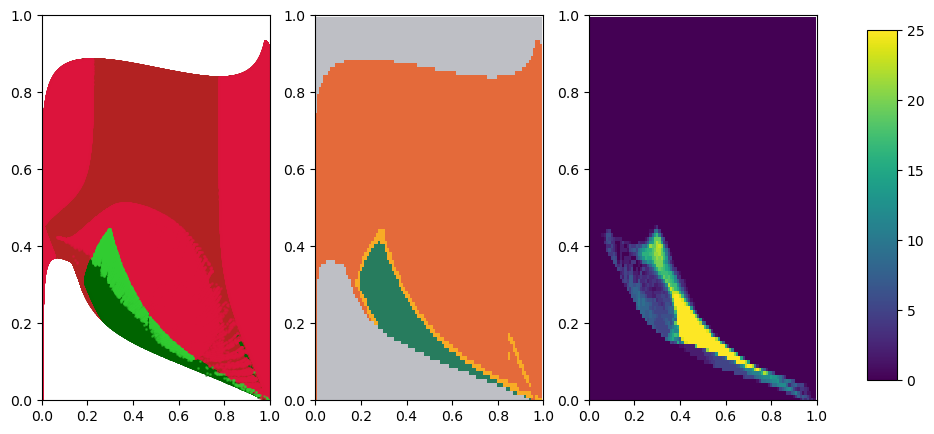

36  solvable?:  True


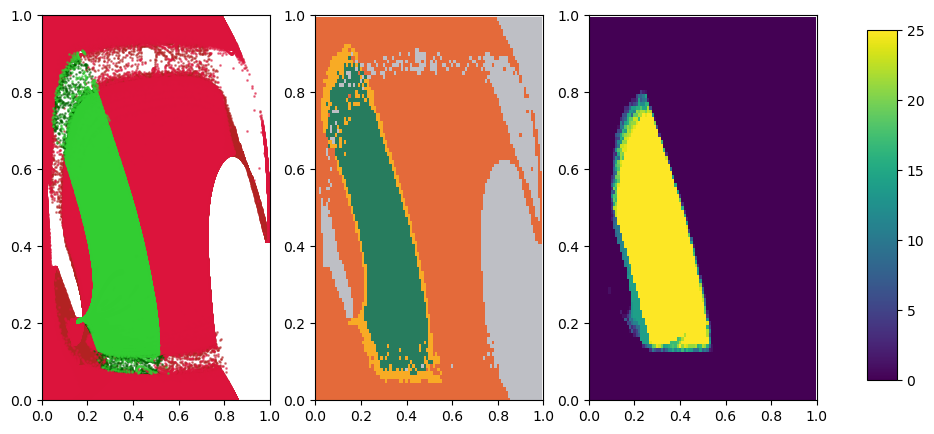

37  solvable?:  True


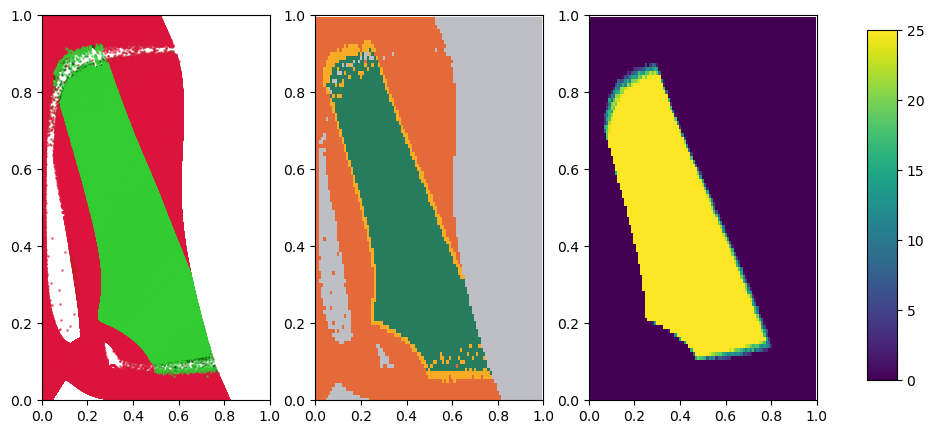

38  solvable?:  True


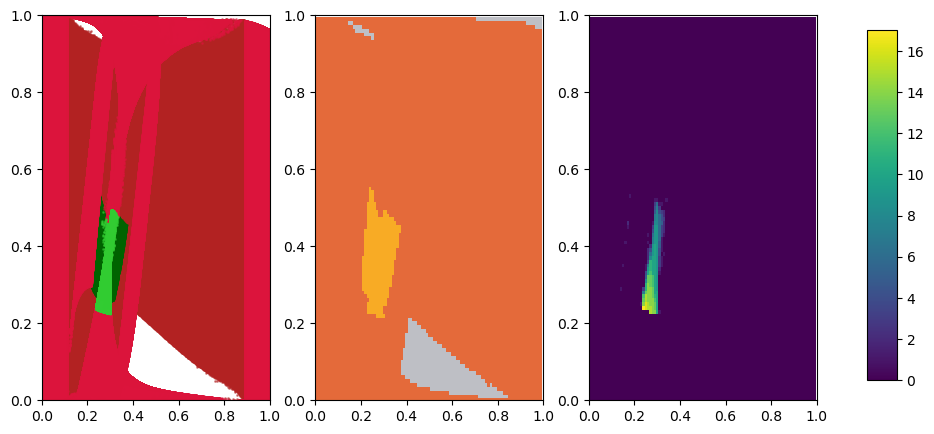

39  solvable?:  False


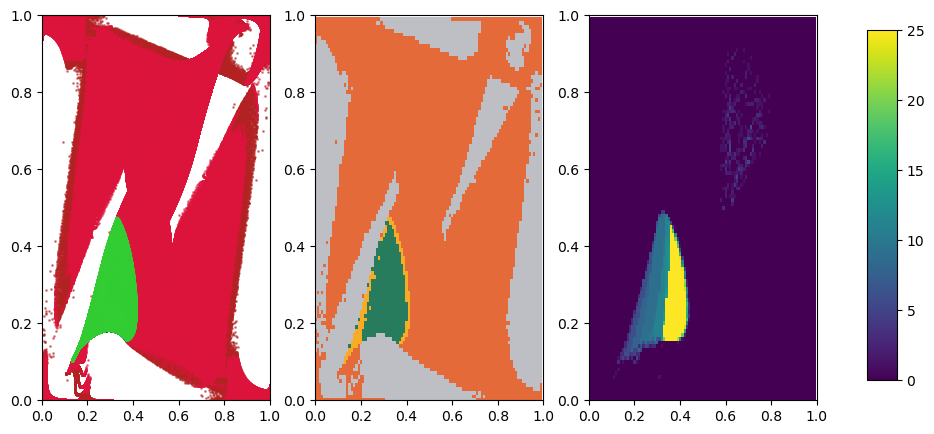

40  solvable?:  True


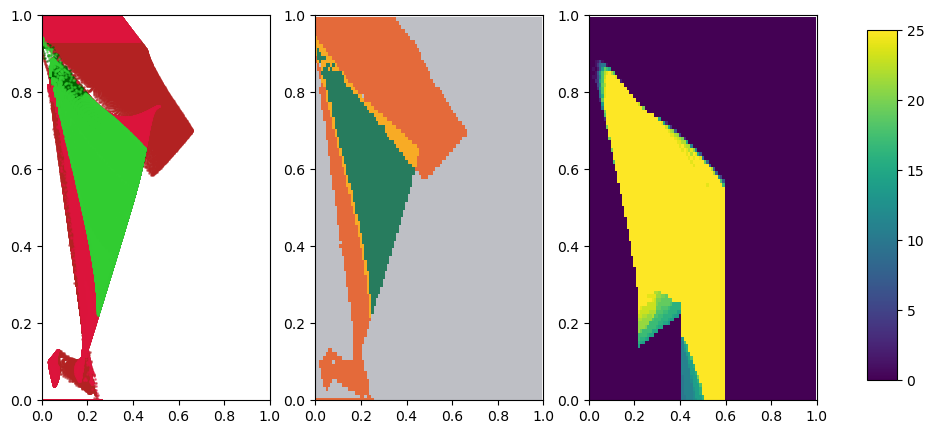

41  solvable?:  True


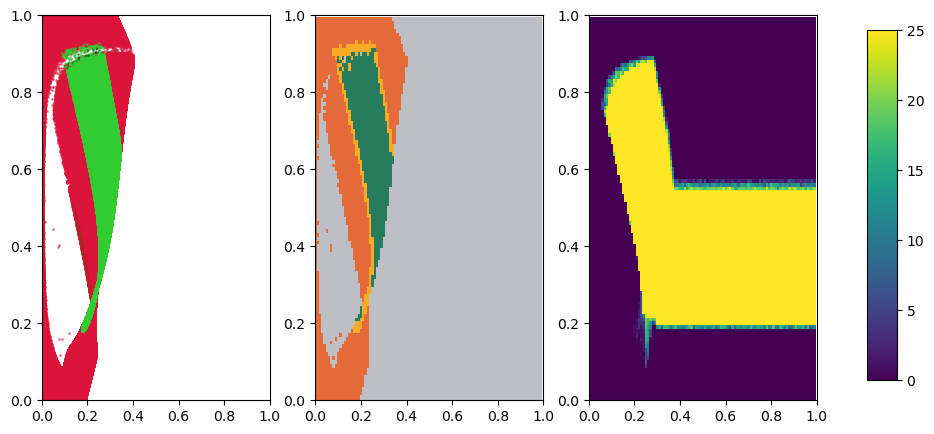

42  solvable?:  True


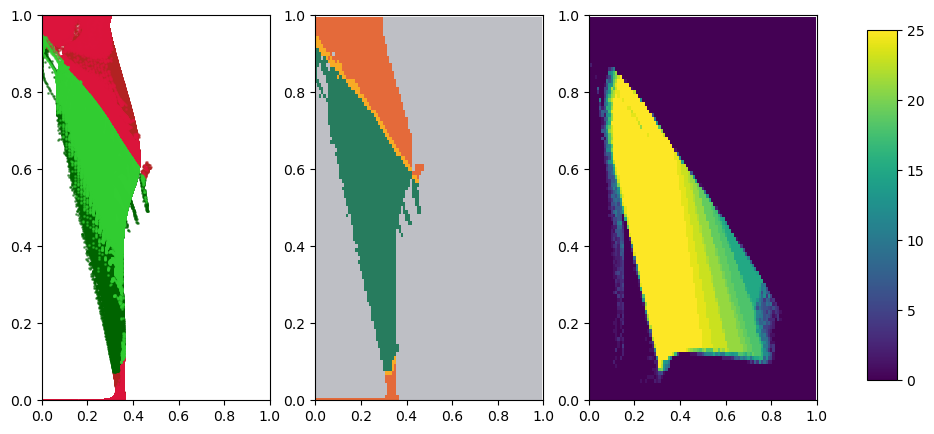

43  solvable?:  True


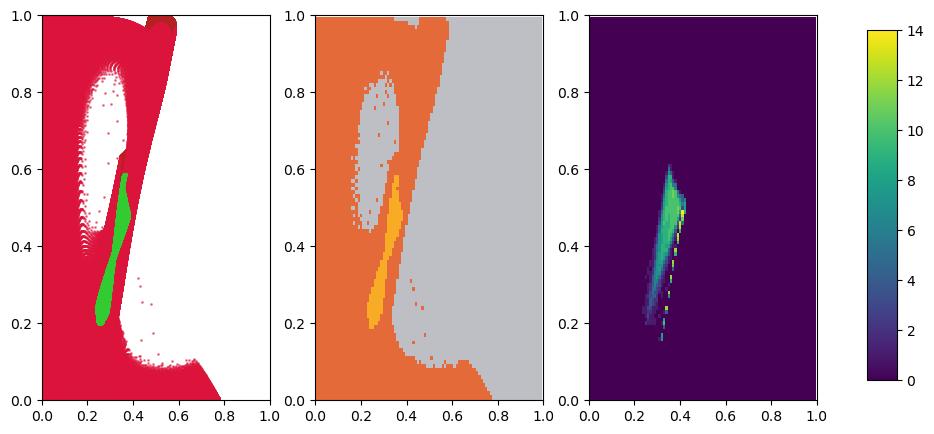

44  solvable?:  False


KeyboardInterrupt: 

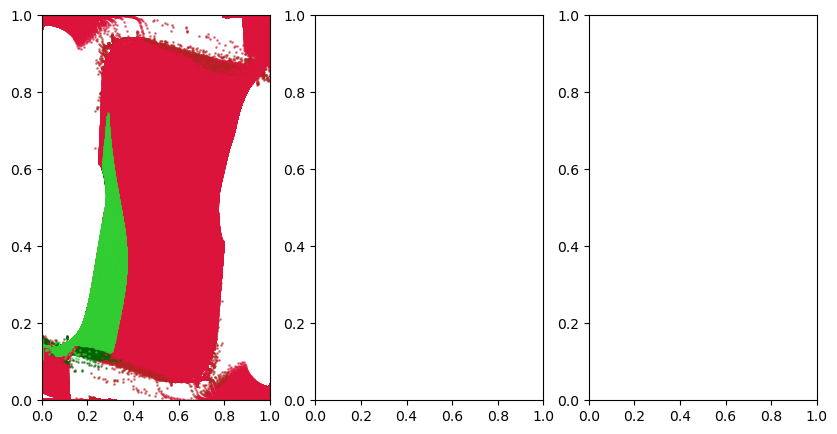

In [45]:
for i in range(1,100):
    pyloricslice = get_pyloric_slice(i,high_res=True)
    avgs = get_avg_slice(i,slicetype="high_res") #swaps the axes
    hpparslice = np.loadtxt('./Specifically Evolved HP Mechanisms/Every Circuit/%s/HPparslice_newrho_res5.dat'%i).T
    solvability = sidebyside(avgs,pyloricslice,hpparslice,True)
    print(i," solvable?: ", solvability)

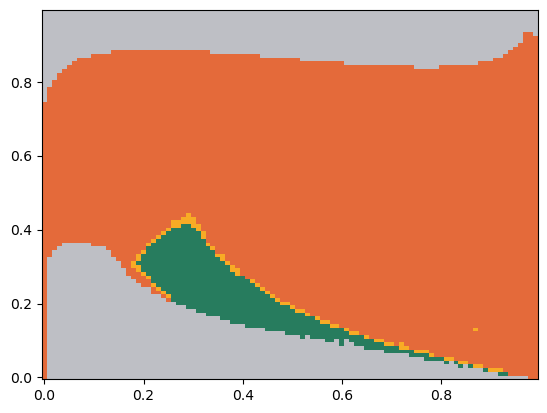

In [119]:
gridres,densitygrid = avgs_density(36,.01)
colormap = mcolors.ListedColormap([french_gray,flame,xanthous,viridian])
plt.pcolormesh(gridres,gridres,densitygrid,cmap=colormap)

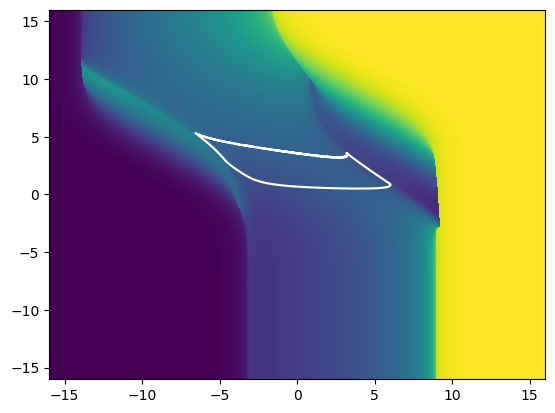

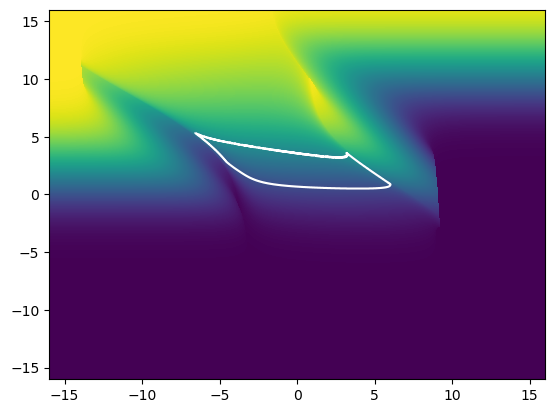

In [100]:
avgs = get_avg_slice(39,slicetype='high_res')
plt.pcolormesh(par1res,par2res,avgs[:,:,0])
plot_outline(39,'white')
plt.show()
plt.pcolormesh(par1res,par2res,avgs[:,:,2])
plot_outline(39,'white')
plt.show()

In [24]:
plot_HP_contours(26,.3,.3,[0],'w')

OSError: ./Specifically Evolved HP mechanisms/Every Circuit/26/HPAgnosticAverage_highres_newrho.dat not found.

Ask whether there is any value in the pyloric region which is "stable" (approached in the correct way from both dimensions)

In [252]:
[par1s,par2s] =np.where(pyloricslice>=.3)
paridxs = np.dstack((par1s,par2s))
print(paridxs)

[[[  0 199]
  [  0 200]
  [  0 201]
  ...
  [ 38 198]
  [ 38 199]
  [ 39 195]]]


In [330]:
def find_nullcline(indiv,LB1,LB3,UB1,UB3,tolerance = 0.001):
    avgs = get_avg_slice(indiv)
    # pyloricslice = get_pyloric_slice(indiv)
    N1_nullcline = []
    N3_nullcline = []
    for i in range(len(par1res)):
        for j in range(len(par2res)):
            if (avgs[i,j,0]+tolerance>LB1 and avgs[i,j,0]+tolerance<UB1) or (avgs[i,j,0]-tolerance>LB1 and avgs[i,j,0]-tolerance<UB1):
                N1_nullcline.append([par2res[j],par1res[i]])
            if (avgs[i,j,2]+tolerance>LB3) and (avgs[i,j,2]-tolerance<UB3):
                N3_nullcline.append([par2res[j],par1res[i]])
    return N1_nullcline,N3_nullcline

In [64]:
def rho(val,LB,UB):
    rho = np.piecewise(val,[val<LB,val>UB],[lambda val:(LB-val)/LB,lambda val:(UB-val)/(1-UB),0])
    return rho

def newrho(val,LB,UB):
    rho = np.piecewise(val,[val<LB,val>UB],[lambda val:-val+LB,lambda val:-val+UB,0])
    return rho

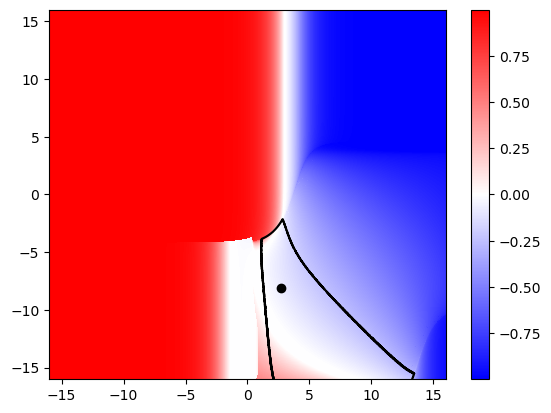

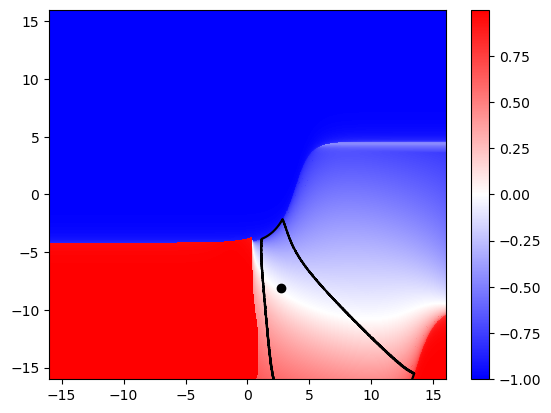

In [66]:
avgs = get_avg_slice(19,'high_res')
LB1 = 0.17125
LB3 = 0.355329
UB1 = 0.17125+0.0261298
UB3 = 0.355329

PeteB1 = 2.68606
PeteB3 = -8.09309

rho_1_avg = rho(avgs[:,:,0],LB1,UB1)
rho_3_avg = rho(avgs[:,:,2],LB3,UB3)

plt.pcolormesh(par1res,par2res,rho_1_avg,cmap='bwr')
plt.colorbar()
plot_outline(19,'black')
plt.scatter(PeteB1,PeteB3,color='k')
plt.show()
plt.pcolormesh(par1res,par2res,rho_3_avg,cmap='bwr')
plt.colorbar()
plt.scatter(PeteB1,PeteB3,color='k')
plot_outline(19,'black')
plt.show()

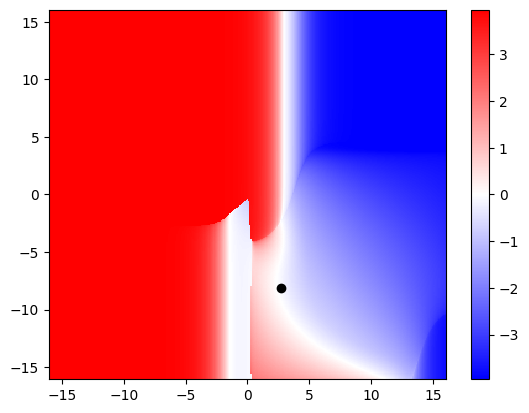

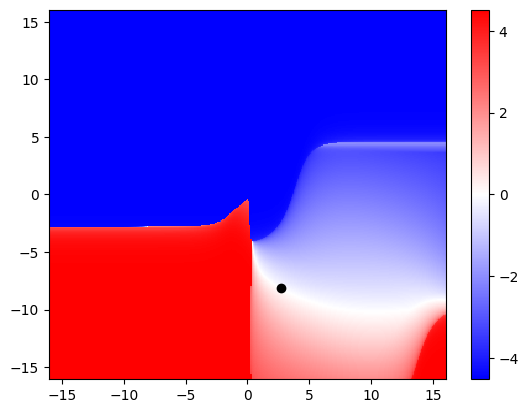

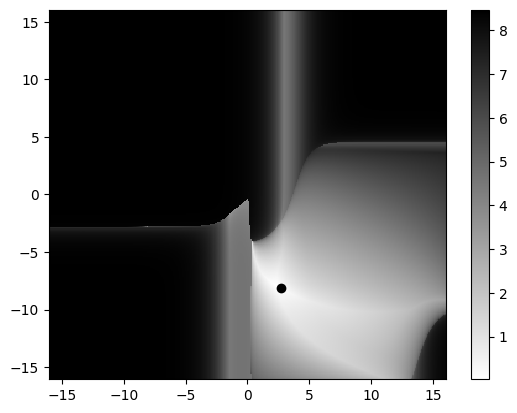

In [ ]:
#compare to the actual HP-directed change
change = np.loadtxt('./Petenetchangex33.dat')
change = change.reshape((len(par1res),len(par2res),2))
change = np.swapaxes(change,1,0)

plt.pcolormesh(par1res,par2res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(PeteB1,PeteB3,color='k')
plt.show()
plt.pcolormesh(par1res,par2res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(PeteB1,PeteB3,color='k')
plt.show()
plt.pcolormesh(par1res,par2res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(PeteB1,PeteB3,color='k')
plt.show()

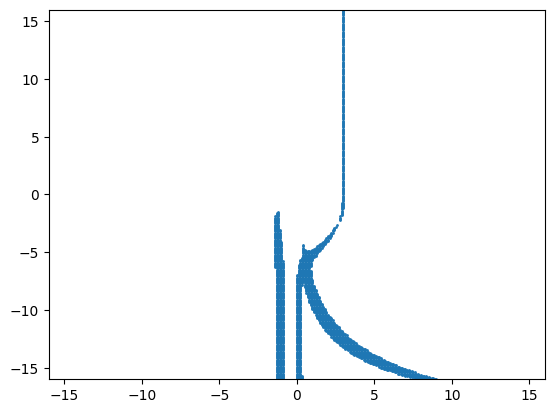

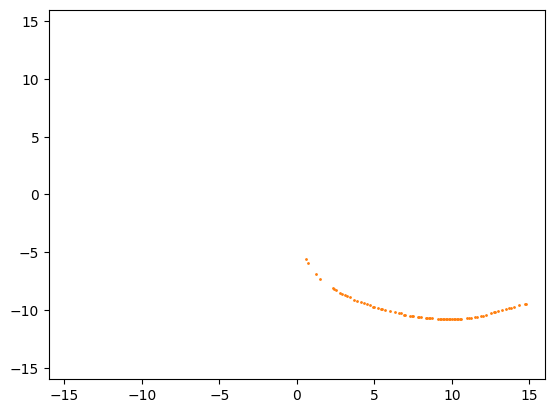

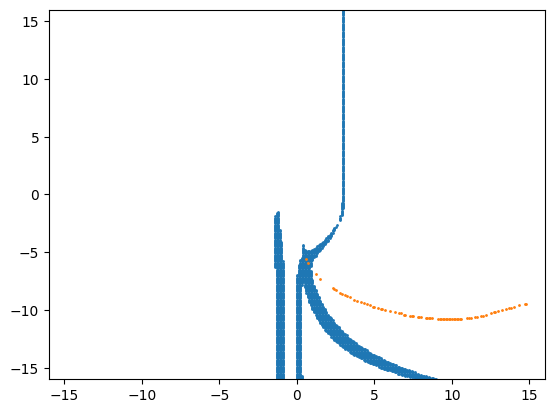

In [332]:
[n1_nullcline,n3_nullcline] = find_nullcline(19,0.17125, 0.355329, 0.17125+0.0261298, 0.355329,tolerance = 0.001)
n1_nullcline = np.array(n1_nullcline)
n3_nullcline = np.array(n3_nullcline)
plt.scatter(n1_nullcline[:,0],n1_nullcline[:,1],s=1)
plt.xlim((-16,16))
plt.ylim((-16,16))
plt.show()
plt.scatter(n3_nullcline[:,0],n3_nullcline[:,1],s=1,color='tab:orange')
plt.xlim((-16,16))
plt.ylim((-16,16))
plt.show()
plt.scatter(n1_nullcline[:,0],n1_nullcline[:,1],s=1,color='tab:blue')
plt.scatter(n3_nullcline[:,0],n3_nullcline[:,1],s=1,color='tab:orange')
plt.ylim((-16,16))
plt.xlim((-16,16))
plt.show()

In [293]:
def stable_existence(indiv, LB1,UB1,LB3,UB3):
    avgs = get_avg_slice(indiv)
    pyloricslice = get_pyloric_slice(indiv)
    [par1s,par2s] =np.where(pyloricslice>=.3)
    paridxs = np.dstack((par1s,par2s))[0]
    stable_point_existence = False
    stable_point_example = np.zeros(2)
    for point in paridxs:
        par1stability = False
        par2stability = False
        #is it stable from the left or from the right
        if ((point[0]>0) and (avgs[point[0]-1,point[1],0] < LB1) and (avgs[point[0],point[1],0] >= LB1)) or ((point[0]<len(par1res)) and (avgs[point[0]+1,point[1],0] > UB1) and (avgs[point[0],point[1],0] <= UB1)):
            par1stability = True
            stable_point_example[0] = par1res[point[0]]
        # and is it stable from above or below
        if ((point[1]>0) and (avgs[point[0],point[1]-1,2] < LB3) and (avgs[point[0],point[1],2] >= LB3)) or ((point[1]<len(par2res)) and (avgs[point[0],point[1]+1,2] > UB3) and (avgs[point[0],point[1],2] <= UB3)):
            par2stability = True
            stable_point_example[1] = par2res[point[1]]
        if(par1stability and par2stability):
            stable_point_existence = True
            break
    if stable_point_existence:
        return stable_point_existence, stable_point_example
    else: 
        return stable_point_existence

In [295]:
#this function does not search all possible HP values for a stable point, but
#provides information specific to a set of HP values
stable_existence(19,0.130271, 0.235268 ,0.130271+0.0902739, 0.235268+ 0.0642635)

False

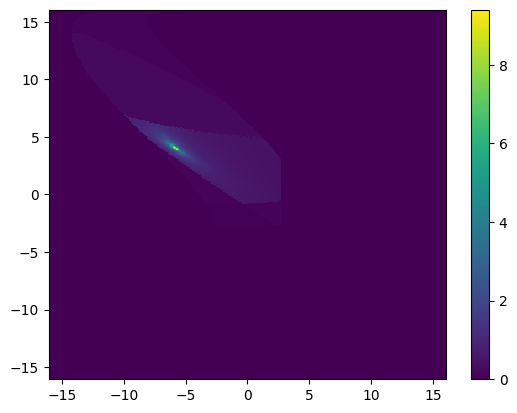

In [465]:
slice = get_pyloric_slice(82)
plt.pcolormesh(par1res,par2res,slice)
plt.colorbar()
plt.show()

Specific unsolvable example from individual 18

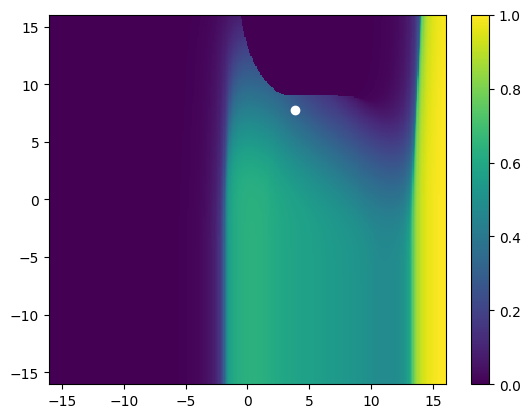

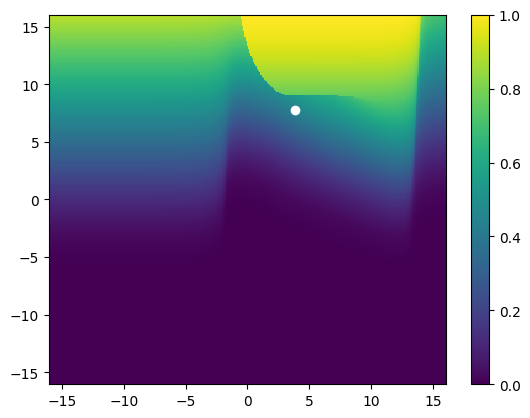

In [62]:
avgs = np.loadtxt("./Specifically Evolved HP mechanisms/Every Circuit/18/HPAgnosticAverage.dat")
avgs = avgs.reshape((len(par1res),len(par2res),3))
avgs = np.swapaxes(avgs,1,0)
circuitB1 = 3.87673
circuitB3 = 7.72929
plt.pcolormesh(par1res,par2res,avgs[:,:,0])
plt.scatter(circuitB1,circuitB3,color='white')
plt.colorbar()
plt.show()
plt.pcolormesh(par1res,par2res,avgs[:,:,2])
plt.scatter(circuitB1,circuitB3,color='white')
plt.colorbar()
plt.show()

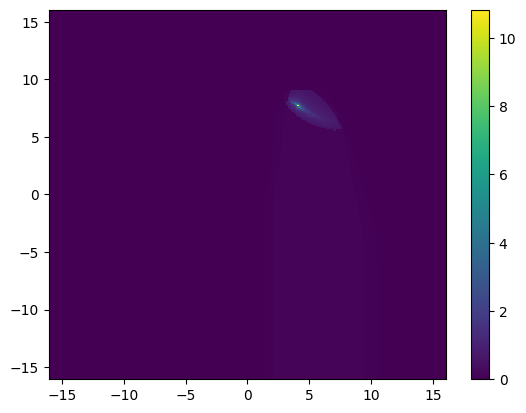

In [63]:
pyloricslice = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/18/pyloricslice.dat').reshape((len(par1res),len(par2res)))
pyloricslice = np.swapaxes(pyloricslice,1,0)
plt.pcolormesh(par1res,par2res,pyloricslice)
plt.colorbar()
plt.show()

In [64]:
maskingslice = np.repeat(pyloricslice,3,axis=1).reshape((len(pyloricslice),len(pyloricslice[0]),3))

In [65]:
pyloricavgs = np.ma.masked_where(maskingslice<0.3,avgs)
nonpyloricavgs = np.ma.masked_where(maskingslice>=0.3,avgs)

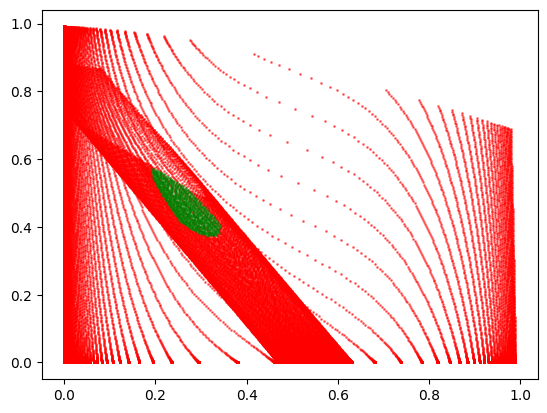

In [69]:
plt.scatter(nonpyloricavgs[:,:,0],nonpyloricavgs[:,:,2],color='red',alpha=.5,s=1)
plt.scatter(pyloricavgs[:,:,0],pyloricavgs[:,:,2],color='green',alpha=.5,s=1)

Specific solvable example from individual 19

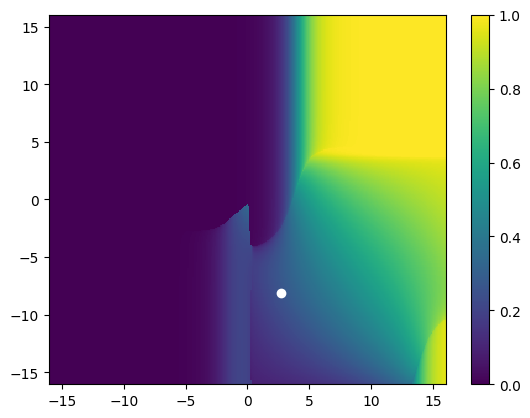

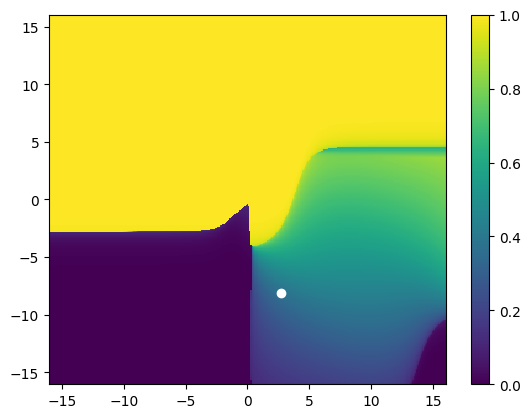

In [70]:
avgs = np.loadtxt("./Specifically Evolved HP mechanisms/Every Circuit/19/HPAgnosticAverage.dat")
avgs = avgs.reshape((len(par1res),len(par2res),3))
avgs = np.swapaxes(avgs,1,0)
circuitB1 = 2.68606
circuitB3 = -8.09309 
plt.pcolormesh(par1res,par2res,avgs[:,:,0])
plt.scatter(circuitB1,circuitB3,color='white')
plt.colorbar()
plt.show()
plt.pcolormesh(par1res,par2res,avgs[:,:,2])
plt.scatter(circuitB1,circuitB3,color='white')
plt.colorbar()
plt.show()

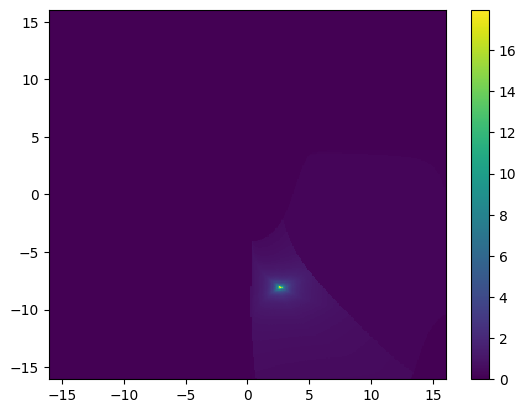

In [75]:
pyloricslice = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/19/pyloricslice.dat').reshape((len(par1res),len(par2res)))
pyloricslice = np.swapaxes(pyloricslice,1,0)
plt.pcolormesh(par1res,par2res,pyloricslice)
plt.colorbar()
plt.show()

In [76]:
maskingslice = np.repeat(pyloricslice,3,axis=1).reshape((len(pyloricslice),len(pyloricslice[0]),3))

In [77]:
pyloricavgs = np.ma.masked_where(maskingslice<0.3,avgs)
nonpyloricavgs = np.ma.masked_where(maskingslice>=0.3,avgs)

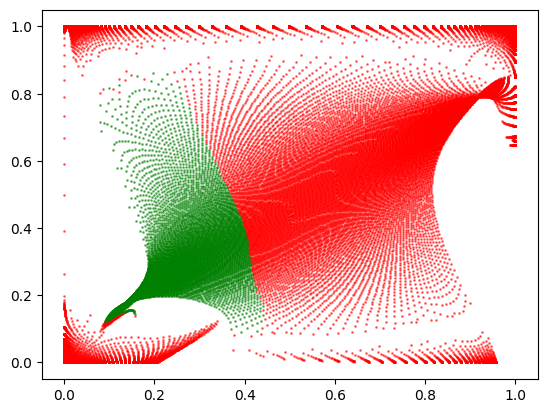

In [78]:
plt.scatter(nonpyloricavgs[:,:,0],nonpyloricavgs[:,:,2],color='red',alpha=.5,s=1)
plt.scatter(pyloricavgs[:,:,0],pyloricavgs[:,:,2],color='green',alpha=.5,s=1)

## Here is the Figure Formatting 

In [1127]:
#load in trajectories and choose indecies to use
dt = .005
dur = 20000+(2*dt)
time = np.arange(0,dur,dt)

good_Trajectories = np.loadtxt('./Convenient HP Mechanisms/good_biastrack.dat')

# good_Trajectories = np.loadtxt('./Convenient HP Mechanisms/good_biastrack.dat').reshape(len(time),2)
# bad_Trajectories = np.loadtxt('./Convenient HP Mechanisms/bad_biastrack.dat').reshape(len(time),2)

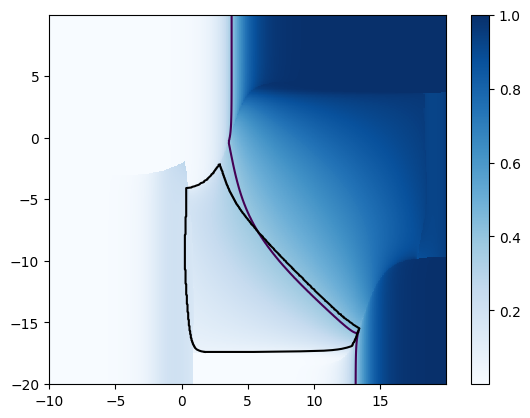

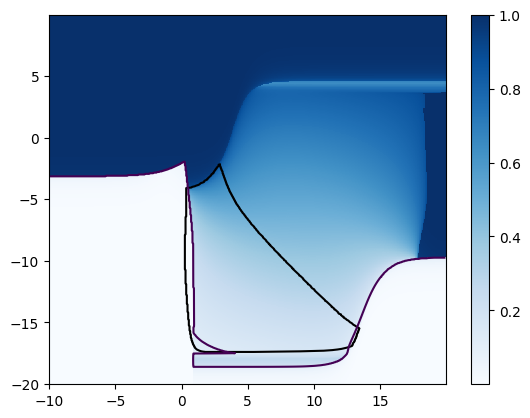

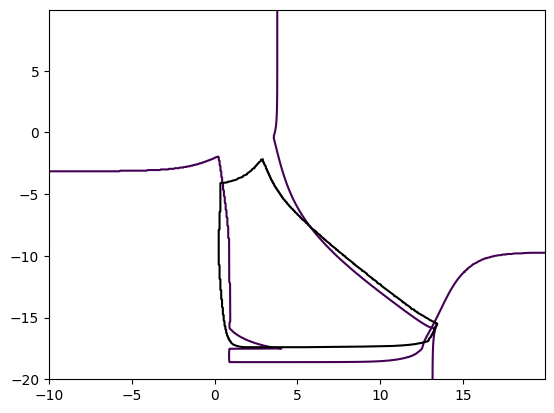

In [1128]:
avgs,multi = get_avg_slice(19,type = 'multistability_check')

# avgs_multi, multistability = get_avg_slice(19,type='multistability_check')

#determine whether defaulting to the lower initial condition is affecting the detected averages in an appreciable way...?
plt.pcolormesh(par1res,par2res,avgs[:,:,0],cmap="Blues")
plt.colorbar()
plt.contour(par1res,par2res,avgs[:,:,0],levels=[0.386618])
plot_outline(19,'black',True)
plt.show()
plt.pcolormesh(par1res,par2res,avgs[:,:,2],cmap="Blues")
plt.colorbar()
plot_outline(19,'black',True)
plt.contour(par1res,par2res,avgs[:,:,2],levels=[0.128416])
plt.show()
plt.contour(par1res,par2res,avgs[:,:,0],levels=[0.386618])
plt.contour(par1res,par2res,avgs[:,:,2],levels=[0.128416])
plot_outline(19,'black',True)
# plt.pcolormesh(par1res,par2res,avgs_multi[:,:,0])
# plt.show()
# plt.pcolormesh(par1res,par2res,avgs[:,:,0]-avgs_multi[:,:,0])
# plt.show()
# traj = np.loadtxt('./Convenient HP Mechanisms/good_biastrack.dat').reshape((repeats,len(time),2))
# plt.scatter(traj[0,-1,0],traj[0,-1,1])
# for i in range(repeats):
#     plt.plot(traj[i,:,0],traj[i,:,1],linewidth=1,color=french_gray)
plt.show()



ValueError: cannot reshape array of size 103041 into shape (600,600)

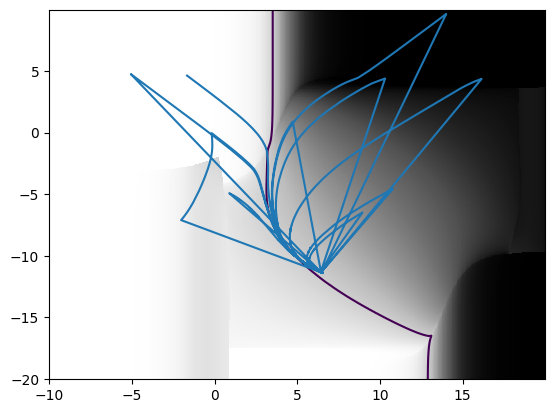

In [1129]:

# good_Trajectories = np.loadtxt('./Convenient HP Mechanisms/good_biastrack.dat').reshape(len(time),2)

PeteB1 = 2.68606
PeteB3 = -8.09309

plt.pcolormesh(par1res,par2res,avgs[:,:,0],cmap="Greys")
plt.contour(par1res,par2res,avgs[:,:,0],levels=[.3])
# plot_nullcline('par1',.17125,avgs,viridian)
plt.plot(good_Trajectories[:,0],good_Trajectories[:,1])
plot_outline(19,"r",False)
plt.scatter([PeteB1],[PeteB3],color='k')
plt.show()
plt.pcolormesh(par1res,par2res,avgs[:,:,2],cmap="Greys")
plt.contour(par1res,par2res,avgs[:,:,2],levels=[.3])
plt.plot(good_Trajectories[:,0],good_Trajectories[:,1])
plot_outline(19,"r",False)
plt.show()

plt.contour(par1res,par2res,avgs[:,:,0],levels=[.3])
plt.contour(par1res,par2res,avgs[:,:,2],levels=[.3])
plt.show()

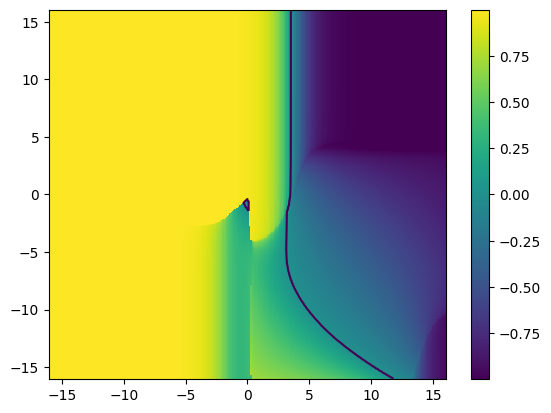

In [ ]:
# print(avgs[:,:,0])
test = rho(avgs[:,:,0],.3,.3)
plt.pcolormesh(par1res,par2res,test)
plt.colorbar()
plt.contour(par1res,par2res,test,levels=[0])

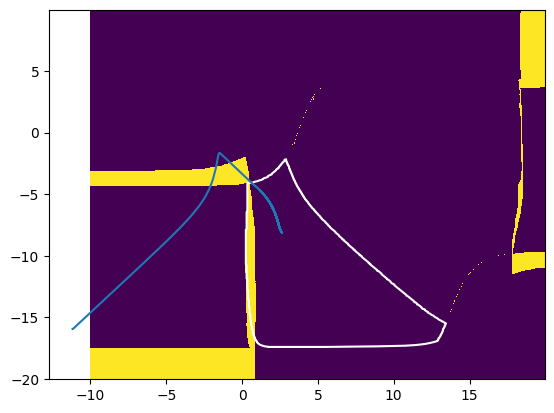

In [ ]:
#there's a serious problem here let's check the multistability

plt.pcolormesh(par1res,par2res,multistability)
plot_outline(19,'w',True)
plt.plot(good_Trajectories[:,0],good_Trajectories[:,1])

In [836]:
#get the new data

avgs = np.zeros((len(par1res),len(par2res),3))

for i in range(600):
    bar = np.loadtxt("./CompareHPagnostic%s.dat"%i).reshape((len(par2res),2))
    avgs[:,i,::2] = bar
    avgs.swapaxes(0,1)



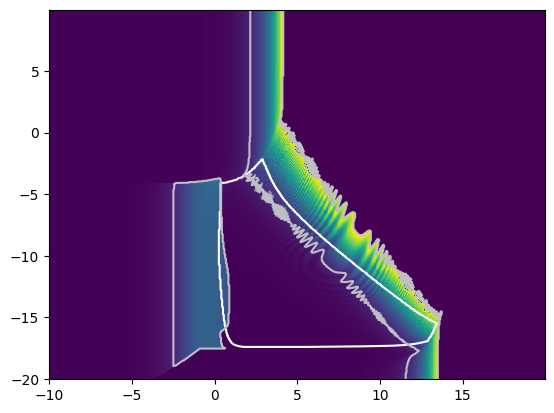

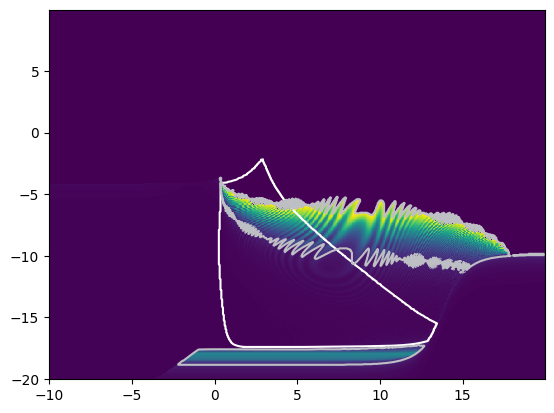

In [838]:
plt.pcolormesh(par1res,par2res,avgs[:,:,0])
plot_outline(19,'white',True)
plt.contour(par1res,par2res,avgs[:,:,0],levels=[.1],colors=french_gray)
# plot_nullcline('par1',.2,avgs,color='white')
plt.show()
plt.pcolormesh(par1res,par2res,avgs[:,:,2])
plot_outline(19,'white',True)
plt.contour(par1res,par2res,avgs[:,:,2],levels=[.1],colors=french_gray)
plt.show()

[ 12.9629 -14.6107] [ 12.9629 -14.6107]


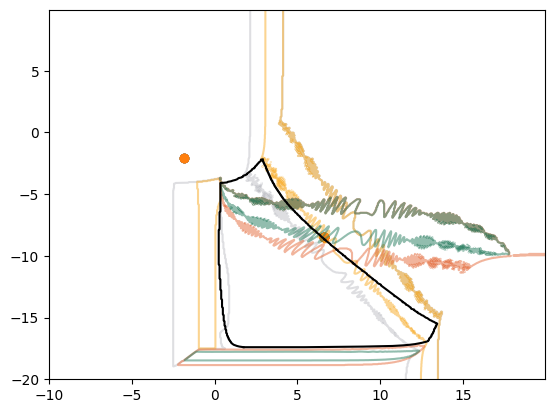

In [ ]:
level = [[.1,.3],[.1,.3]]
dur = 20000
dt = 0.05
time = np.arange(0,dur+dt,dt)
repeats = 10
traj = np.loadtxt('./Convenient HP Mechanisms/good_biastrack.dat').reshape((repeats,len(time),2))
print(traj[0,0],traj[0,1])
plt.contour(par1res,par2res,avgs[:,:,0],levels=level[0],colors=[french_gray,xanthous],alpha=.5)
plt.contour(par1res,par2res,avgs[:,:,2],levels=level[1],colors=[flame,viridian],alpha=.5)
# for i in range(repeats):
    # plt.plot(traj[i,:,0],traj[i,:,1])
plt.scatter(traj[:,-1,0],traj[:,-1,1])
plt.scatter(traj[:,-1,0],traj[:,-1,1])
plot_outline(19,'black',True)
plt.show()

In [38]:
dur = 100000
dt = 0.05
time = np.arange(0,dur+dt,dt)
repeats = int(1000/50)
trackinterval = 5

In [40]:
trajgood = np.loadtxt('./Convenient HP Mechanisms/Petebiastrackgood.dat').reshape((repeats,int(len(time)/trackinterval),2))
trajmixed = np.loadtxt('./Convenient HP Mechanisms/Petebiastrackmixed.dat').reshape((repeats,int(len(time)/trackinterval),2))
trajbad = np.loadtxt('./Convenient HP Mechanisms/Petebiastrackbad.dat').reshape((repeats,int(len(time)/trackinterval),2))

In [43]:
for i in range(len(trajmixed)):
    print(trajmixed[i,-1,:])

[  6.08994 -15.3264 ]
[  4.563 -14.695]
[-0.596643 -4.26107 ]
[-0.814819 -3.29162 ]
[  6.19106 -15.3609 ]
[  4.69682 -14.7597 ]
[-1.1998  -1.54406]
[-0.80573 -3.30475]
[  4.63479 -14.7309 ]
[  6.19454 -15.3619 ]
[  4.73586 -14.7768 ]
[-0.740501 -3.63665 ]
[  5.14328 -14.9627 ]
[  4.65388 -14.7403 ]
[  6.24288 -15.3783 ]
[  4.64206 -14.7306 ]
[  4.64339 -14.7352 ]
[  4.89544 -14.8534 ]
[-0.877261 -2.99131 ]
[  6.19596 -15.3631 ]


[0.17     0.257165 0.5     ]
[-15.1176     9.44068    5.43897  -15.7016   -18.3246     0.350228
 -16.437     -4.47414    6.50992  -18.1514     1.48646   -1.46615
  -9.43282    0.169592 -18.1969     9.7138     3.63349   -5.1977
   8.66728  -18.4593  ]


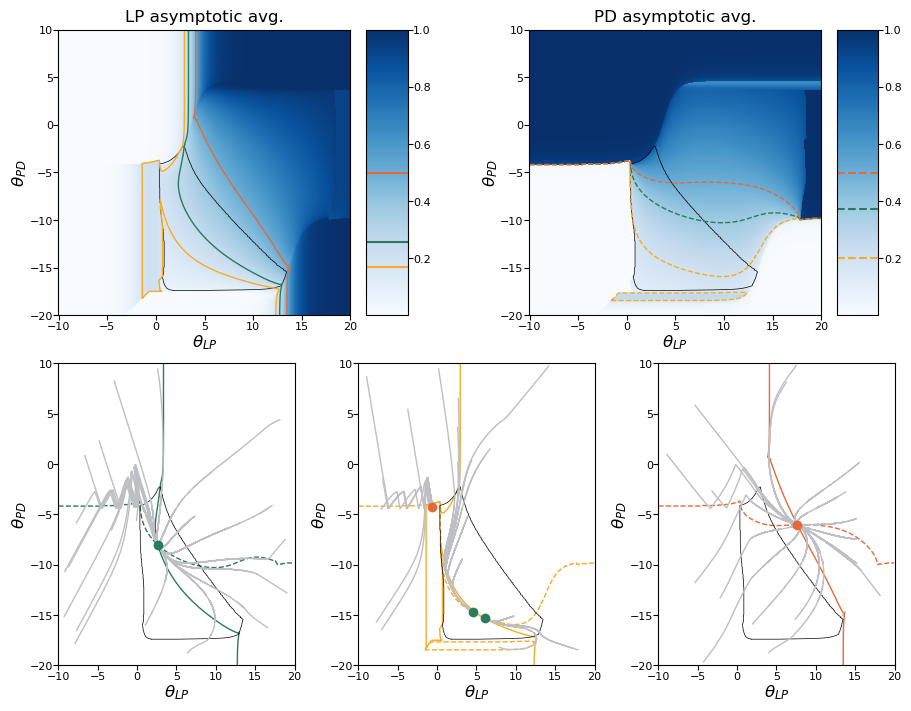

In [ ]:
#summary figure
avgs,dutycycles = get_avg_slice(19,type='newrho')

good_targets = [0.257165,0.371159]
bad_targets = [.5,.5]
mixed_targets = [.17,.2]
all_targets = np.array([mixed_targets,good_targets,bad_targets])
print(all_targets[:,0])

upper_arr = [['a','a','a','a','a','a','a','colorbar1','.','b','b','b','b','b','b','b','colorbar2']]
lower_arr = [['c','d','e']]
arrangementstring = [[upper_arr],[lower_arr]]
fig, axd = plt.subplot_mosaic(arrangementstring,figsize=(9, 7), layout="constrained",gridspec_kw={"hspace":5})

ax1,colorbarax1,ax2,colorbarax2,ax3,ax4,ax5 = fig.get_axes()

#LP mesh and nullclines
mesh1= ax1.pcolormesh(par1res,par2res,avgs[:,:,0],cmap="Blues")
plot_outline(19,'black',True,ax=ax1)
cbar1 = fig.colorbar(mesh1,cax=colorbarax1, ax=[ax1])
contour1 = ax1.contour(par1res,par2res,avgs[:,:,0],levels=all_targets[:,0],colors=[xanthous,viridian,flame],linewidths=1)
cbar1.ax.hlines(all_targets[:,0],0,1,colors=[xanthous,viridian,flame])
cbar1.ax.tick_params(labelsize=8,pad=.5)
ax1.set_title('LP asymptotic avg.')

#PD mesh and nullclines
mesh2=ax2.pcolormesh(par1res,par2res,avgs[:,:,2],cmap="Blues")
plot_outline(19,'black',True,ax=ax2)
cbar2 = fig.colorbar(mesh2,cax=colorbarax2, ax=[ax2])
contour2 = ax2.contour(par1res,par2res,avgs[:,:,2],levels=all_targets[:,1],colors=[xanthous,viridian,flame],linestyles='dashed',linewidths=1)
cbar2.ax.hlines(all_targets[:,1],0,1,colors=[xanthous,viridian,flame],linestyles='dashed')
cbar2.ax.tick_params(labelsize=8,pad=.5)
ax2.set_title('PD asymptotic avg.')

#good HP nullclines and trajectories
contour3n1 = ax3.contour(par1res,par2res,avgs[:,:,0],levels=[good_targets[0]],colors=viridian,linewidths=1)
contour3n3 = ax3.contour(par1res,par2res,avgs[:,:,2],levels=[good_targets[1]],colors=viridian,linewidths=1,linestyles='dashed')
plot_outline(19,'black',True,ax=ax3)
ax3.scatter(trajgood[0,-1,0],trajgood[0,-1,1],color=viridian,zorder=3)
for i in range(repeats):
    ax3.plot(trajgood[i,:,0],trajgood[i,:,1],linewidth=1,color=french_gray)

#mixed HP nullclines and trajectories
contour4n1 = ax4.contour(par1res,par2res,avgs[:,:,0],levels=[mixed_targets[0]],colors=xanthous,linewidths=1)
contour4n3 = ax4.contour(par1res,par2res,avgs[:,:,2],levels=[mixed_targets[1]],colors=xanthous,linewidths=1,linestyles='dashed')
plot_outline(19,'black',True,ax=ax4)
print(trajmixed[:,0,1])
ax4.scatter(trajmixed[0,-1,0],trajmixed[0,-1,1],color=viridian,zorder=3)
ax4.scatter(trajmixed[1,-1,0],trajmixed[1,-1,1],color=viridian,zorder=3)
ax4.scatter(trajmixed[2,-1,0],trajmixed[2,-1,1],color=flame,zorder=3)
for i in range(repeats):
    ax4.plot(trajmixed[i,:,0],trajmixed[i,:,1],linewidth=1,color=french_gray)

#bad HP nullclines and trajectories
contour5n1 = ax5.contour(par1res,par2res,avgs[:,:,0],levels=[bad_targets[0]],colors=flame,linewidths=1)
contour5n3 = ax5.contour(par1res,par2res,avgs[:,:,2],levels=[bad_targets[1]],colors=flame,linewidths=1,linestyles='dashed')
plot_outline(19,'black',True,ax=ax5)
ax5.scatter(trajbad[0,-1,0],trajbad[0,-1,1],color=flame,zorder=3)
for i in range(repeats):
    ax5.plot(trajbad[i,:,0],trajbad[i,:,1],linewidth=1,color=french_gray)

for ax in [ax1,ax2,ax3,ax4,ax5]:
    ax.set_xticks([-10,-5,0,5,10,15,20])
    ax.set_yticks([-20,-15,-10,-5,0,5,10])
    ax.tick_params(labelsize=8,pad=.5)
    ax.set_xlabel(r'$\theta_{LP}$',labelpad=1,fontsize=12)
    ax.set_ylabel(r'$\theta_{PD}$',labelpad=.5,fontsize=12)
plt.show()

OSError: ./Convenient HP Mechanisms/good_biastrack.dat not found.

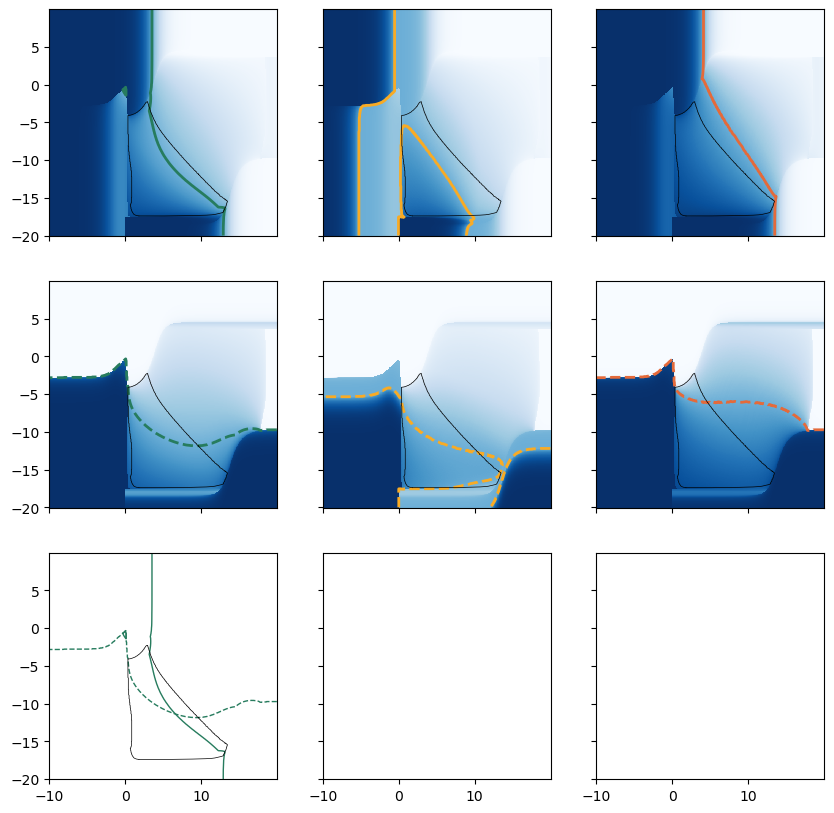

In [ ]:
#reattempt with the 3x3 grid


good_targets = [.3,.3]
bad_targets = [.5,.5]
mixed_targets = [.005,.005]
all_targets = np.array([mixed_targets,good_targets,bad_targets])

fig, axs = plt.subplots(3,3,sharex=True,sharey=True,figsize=(10,10))

#good HP N1 push
goodavgs = np.loadtxt("./Convenient HP Mechanisms/goodnetchange2.dat").reshape(len(par2res),len(par1res),2)
goodavgs = goodavgs.swapaxes(1,0)
axs[0,0].pcolormesh(par1res,par2res,goodavgs[:,:,0],cmap="Blues")
axs[0,0].contour(par1res,par2res,goodavgs[:,:,0],levels=0,colors=viridian,linewidths=2)
plot_outline(19,'black',True,ax=axs[0,0])

#good HP N3push
axs[1,0].pcolormesh(par1res,par2res,goodavgs[:,:,1],cmap="Blues")
axs[1,0].contour(par1res,par2res,goodavgs[:,:,1],levels=0,colors=viridian,linewidths=2,linestyles='dashed')
plot_outline(19,'black',True,ax=axs[1,0])

#mixed HP N1push
mixedavgs = np.loadtxt("./Convenient HP Mechanisms/mixednetchange.dat").reshape(len(par2res),len(par1res),2)
mixedavgs = mixedavgs.swapaxes(1,0)
axs[0,1].pcolormesh(par1res,par2res,mixedavgs[:,:,0],cmap="Blues")
axs[0,1].contour(par1res,par2res,mixedavgs[:,:,0],levels=0,colors=xanthous,linewidths=2)
plot_outline(19,'black',True,ax=axs[0,1])

#mixed HP N3push
axs[1,1].pcolormesh(par1res,par2res,mixedavgs[:,:,1],cmap="Blues")
axs[1,1].contour(par1res,par2res,mixedavgs[:,:,1],levels=0,colors=xanthous,linewidths=2,linestyles='dashed')
plot_outline(19,'black',True,ax=axs[1,1])

#bad HP N1push
badavgs = np.loadtxt("./Convenient HP Mechanisms/badnetchange.dat").reshape(len(par2res),len(par1res),2)
badavgs = badavgs.swapaxes(1,0)
axs[0,2].pcolormesh(par1res,par2res,badavgs[:,:,0],cmap="Blues")
axs[0,2].contour(par1res,par2res,badavgs[:,:,0],levels=0,colors=flame,linewidths=2)
plot_outline(19,'black',True,ax=axs[0,2])

#bad HP n3push
axs[1,2].pcolormesh(par1res,par2res,badavgs[:,:,1],cmap="Blues")
axs[1,2].contour(par1res,par2res,badavgs[:,:,1],levels=0,colors=flame,linestyles = 'dashed',linewidths=2)
plot_outline(19,'black',True,ax=axs[1,2])

#good HP nullclines and trajectories
# contour3n1 = axs[2,0].contour(par1res,par2res,avgs[:,:,0],levels=[good_targets[0]],colors=viridian,linewidths=1)
# contour3n3 = axs[2,0].contour(par1res,par2res,avgs[:,:,2],levels=[good_targets[1]],colors=viridian,linewidths=1,linestyles='dashed')
axs[2,0].contour(par1res,par2res,goodavgs[:,:,0],levels=0,colors=viridian,linewidths=1)
axs[2,0].contour(par1res,par2res,goodavgs[:,:,1],levels=0,colors=viridian,linewidths=1,linestyles='dashed')
plot_outline(19,'black',True,ax=axs[2,0])
traj = np.loadtxt('./Convenient HP Mechanisms/good_biastrack.dat').reshape((repeats,len(time),2))
print(traj[6,-1,0],traj[6,-1,1])
axs[2,0].scatter(traj[1,-1,0],traj[1,-1,1],color=viridian,zorder=3)
for i in range(repeats):
    axs[2,0].plot(traj[i,:,0],traj[i,:,1],linewidth=1,color=french_gray)

#mixed HP nullclines and trajectories
# contour4n1 = axs[2,1].contour(par1res,par2res,avgs[:,:,0],levels=[mixed_targets[0]],colors=xanthous,linewidths=1)
# contour4n3 = axs[2,1].contour(par1res,par2res,avgs[:,:,2],levels=[mixed_targets[1]],colors=xanthous,linewidths=1,linestyles='dashed')
plot_outline(19,'black',True,ax=axs[2,1])
traj = np.loadtxt('./Convenient HP Mechanisms/mixed_biastrack.dat').reshape((repeats,len(time),2))
print(traj[:,0,0])
axs[2,1].contour(par1res,par2res,mixedavgs[:,:,0],levels=0,colors=xanthous,linewidths=1)
axs[2,1].contour(par1res,par2res,mixedavgs[:,:,1],levels=0,colors=xanthous,linewidths=1,linestyles='dashed')
axs[2,1].scatter(traj[0,-1,0]-.7,traj[0,-1,1]-.5,color=flame,zorder=3)
axs[2,1].scatter(traj[7,-1,0],traj[7,-1,1],color=viridian,zorder=3)
print(traj[7,-1,0],traj[7,-1,1])
for i in range(repeats):
    axs[2,1].plot(traj[i,:,0],traj[i,:,1],linewidth=1,color=french_gray)

#bad HP nullclines and trajectories
# contour5n1 = axs[2,2].contour(par1res,par2res,avgs[:,:,0],levels=[bad_targets[0]],colors=flame,linewidths=1)
# contour5n3 = axs[2,2].contour(par1res,par2res,avgs[:,:,2],levels=[bad_targets[1]],colors=flame,linewidths=1,linestyles='dashed')
plot_outline(19,'black',True,ax=axs[2,2])
traj = np.loadtxt('./Convenient HP Mechanisms/bad_biastrack.dat').reshape((repeats,len(time),2))
axs[2,2].scatter(traj[0,-1,0],traj[0,-1,1],color=flame,zorder=3)
print(traj[6,-1,0],traj[6,-1,1])
for i in range(repeats):
    axs[2,2].plot(traj[i,:,0],traj[i,:,1],linewidth=1,color=french_gray)
axs[2,2].contour(par1res,par2res,badavgs[:,:,0],levels=0,colors=flame,linewidths=1)
axs[2,2].contour(par1res,par2res,badavgs[:,:,1],levels=0,colors=flame,linewidths=1,linestyles = 'dashed')

axs[0,0].set_title('Tgt = .3, Avg. Window = 0s',size=12,pad=15)
axs[0,1].set_title('Tgt = .005, Avg. Window = 10s',size=12,pad=15)
axs[0,2].set_title('Tgt = .5, Avg. Window = 0s',size=12,pad=15)
axs[0,0].text(-20,-5.0,"LP asymptotic change", size=12, verticalalignment='center', horizontalalignment='left',rotation=90)
axs[1,0].text(-20,-5.0,"PD asymptotic change", size=12, verticalalignment='center', rotation=90)
axs[2,0].text(-20,-5.0,"Combined", size=12, verticalalignment='center', rotation=90)

for i in range(len(axs)):
    for j in range(len(axs[0])):
        axs[i,j].set_xticks([-10,-5,0,5,10,15,20])
        axs[i,j].set_yticks([-20,-15,-10,-5,0,5,10])
        axs[i,j].tick_params(labelsize=8,pad=.5)
        if i == 2:
            axs[i,j].set_xlabel(r'$\theta_{LP}$',labelpad=1,fontsize=10)
        if j == 0:
            axs[i,j].set_ylabel(r'$\theta_{PD}$',labelpad=.5,fontsize=10)
plt.show()

In [1103]:
#testing new measure:

limitcycle = np.loadtxt("./Convenient HP Mechanisms/nullbiastrack.dat").reshape((-1,3))
starts = np.loadtxt("./Convenient HP Mechanisms/nullstatestrack.dat")

In [1104]:
srt = int(starts[4]/dt)
end = int(starts[-1]/dt)

In [ ]:
x = np.arange(0,2*np.pi,.01)
limitcycle = (np.sin(x)+1)/2
limitcycle = np.repeat(limitcycle,2).reshape((-1,2))
# limitcycle.swapaxes(1,0)
print(limitcycle)
srt = 0
end = len(x)

[[0.5        0.5       ]
 [0.50499992 0.50499992]
 [0.50999933 0.50999933]
 ...
 [0.48840839 0.48840839]
 [0.49340754 0.49340754]
 [0.49840735 0.49840735]]


0.2912408928443478
-0.05419895073101447


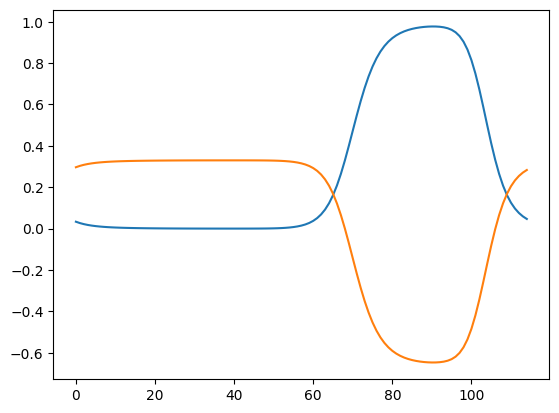

In [ ]:
plt.plot(limitcycle[srt:end,0])
target = .33
plt.plot(newrho(limitcycle[srt:end,0],target,target))
print(np.average(limitcycle[srt:end,0]))
print(np.average(newrho(limitcycle[srt:end],target,target)))


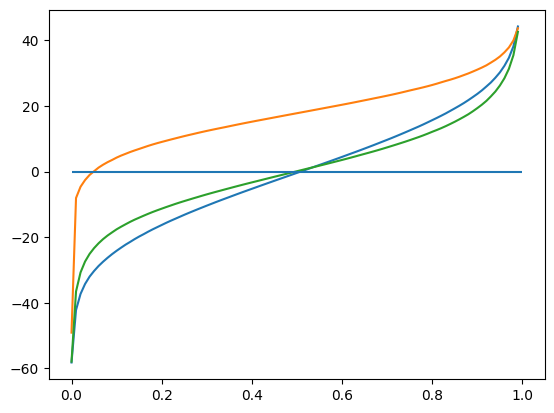

In [ ]:
bs = np.arange(0,1,.01)
test = np.zeros((len(bs),3))
for i in range(len(bs)):
    for j in range(3):
        test[i,j] = np.sum(rho(limitcycle[srt:end,j],bs[i],bs[i]))

plt.plot(bs,test)
plt.hlines(0,1,0)
plt.show()


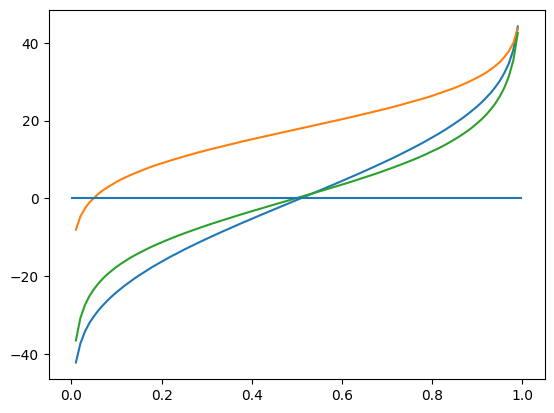

In [1080]:
bs = np.arange(0.01,1,.01)
test = np.zeros((len(bs),3))
for b in range(len(bs)):
    alpha = np.zeros(3)
    alphasteps = np.zeros(3)
    gamma = np.zeros(3)
    gammasteps = np.zeros(3)

    for i in range(srt,end):
        for j in range(3):
            if limitcycle[i,j] < bs[b]:
                alphasteps[j] += 1
                alpha[j] += limitcycle[i,j]
            else:
                gammasteps[j] +=1
                gamma[j] += limitcycle[i,j]
            test[b,j] = alphasteps[j] - (alpha[j]/bs[b]) + ((gammasteps[j]*bs[b])/(1-bs[b])) - (gamma[j]/(1-bs[b]))

plt.plot(bs,test)
plt.hlines(0,1,0)

[ 0.4666395   0.4732014   0.478296    0.482279    0.4854158   0.4879051
  0.4898959   0.49150044  0.49280381  0.4938708   0.49475109  0.49548298
  0.4960962   0.49661392  0.49705436  0.49743184  0.49775773  0.49804102
  0.49828886  0.4985069   0.49869964  0.49887057  0.49902242  0.49915732
  0.4992769   0.49938244  0.499475    0.49955552  0.49962489  0.49968405
  0.49973396  0.49977564  0.49981008  0.49983825  0.49986102  0.49987917
  0.49989332  0.49990392  0.49991126  0.4999154   0.49991607  0.49991256
  0.49990343  0.49988608  0.49985616  0.4998068   0.49972787  0.49960518
  0.49941928  0.49914382  0.4987432   0.49816955  0.49735861  0.49622443
  0.4946519   0.49248687  0.4895226   0.485482    0.4799943   0.472567
  0.4625547   0.449131    0.4312754   0.4077969   0.377421    0.338966
  0.291622    0.235288    0.170865    0.10038     0.026794   -0.046474
 -0.116175   -0.17978    -0.235758   -0.283569   -0.323452   -0.35614
 -0.382595   -0.403829   -0.420782   -0.434277   -0.444999   

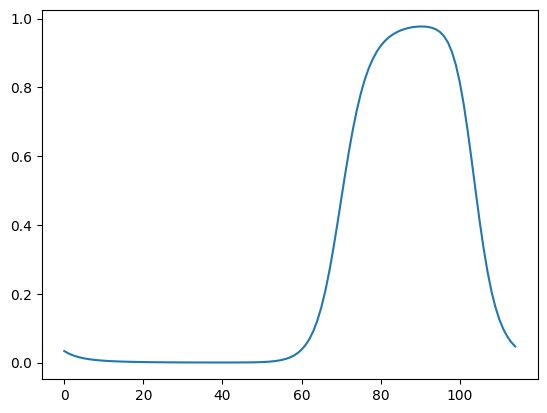

In [ ]:
plt.plot(limitcycle[srt:end,0])
print(newrho(limitcycle[srt:end,0],.5,.5))
print(np.sum(newrho(limitcycle[srt:end,0],.5,.5)))

In [1142]:
def solve_quadratic(a, b, c):
  """Solves a quadratic equation of the form ax^2 + bx + c = 0."""
  # Calculate the discriminant
  discriminant = b**2 - 4 * a * c

  # Find the two solutions
  x1 = (-b + np.sqrt(discriminant)) / (2 * a)
  x2 = (-b - np.sqrt(discriminant)) / (2 * a)

  return x1, x2


0.28695652173913044 0.29124089284434773
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436
0.08908555335330436


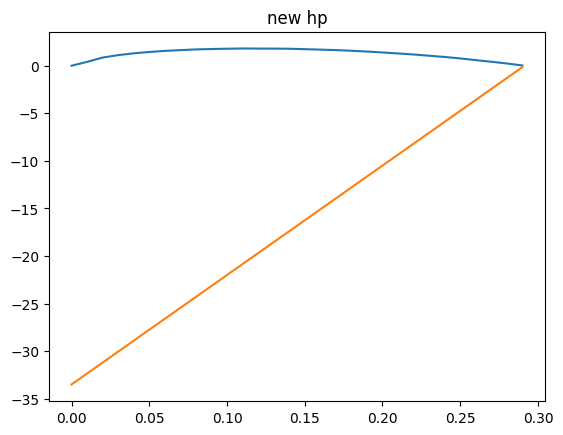

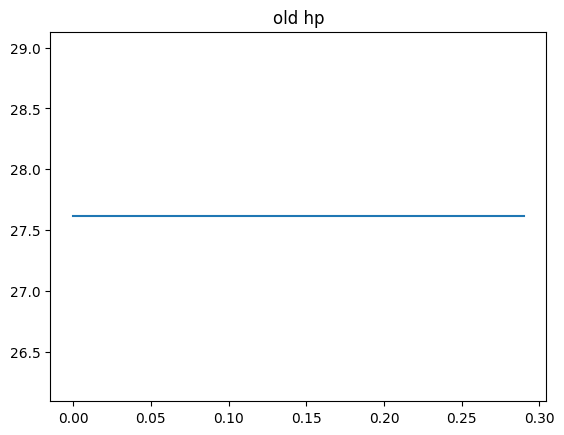

In [1146]:
#new HP
burst_dur = 0
avg_val = 0
for i in range(srt,end):
    if limitcycle[i,0] >= .5:
        burst_dur += 1
    avg_val += limitcycle[i,0]
period = end - srt
avg_val /= period
duty_cycle = burst_dur/period
print(duty_cycle,avg_val)

#old HP
xlow = 0
xhigh = 0
t = 0
h = 0
for i in range(srt,end):
    if limitcycle[i,0] >= .5:
        h += 1
        xhigh += limitcycle[i,0]
    else:
        t += 1
        xlow += limitcycle[i,0]

lbs = np.arange(0,avg_val,0.01)
testnewrho = np.zeros((len(lbs),2))
for i in range(len(lbs)):
    ubnew = (avg_val/duty_cycle)-((1-duty_cycle)*lbs[i]/duty_cycle)
    testnewrho[i,0] = np.sum(newrho(limitcycle[srt:end,0],lbs[i],ubnew))
    testnewrho[i,1] = np.sum(newrho(limitcycle[srt:end,0],lbs[i],lbs[i]))
bs = lbs
testoldrho = np.zeros(len(bs))
for i in range(len(bs)):
    lbold,x2 = solve_quadratic(h-t,t+xlow-xhigh,-xlow)
    print(lbold)
    testoldrho[i] = np.sum(rho(limitcycle[srt:end,0],lbold,lbold))
plt.plot(lbs,testnewrho)
plt.title('new hp')
plt.show()
plt.plot(bs,testoldrho)
plt.title('old hp')
plt.show()


So the assumptions I had are pretty good for the new, shifted rho, HP mechanism. Not so for the old, scaled HP mechanism. This leaves me with the option to redo evolutions for this new HP? Or alternatively just test if it is a good predictor

## Now processing for the 3D version

In [ ]:
avgs_3D = get_avg_slice(15,slicetype='3D')
avgs_3D = avgs_3D.swapaxes(0,2)

In [ ]:
pyloric_3D = np.loadtxt('./Test3DHPonPyloricSolutions/pyloricslice3D_15.dat').reshape((len(par1res),len(par2res),len(par3res)))
pyloric_3D = pyloric_3D.swapaxes(0,2)

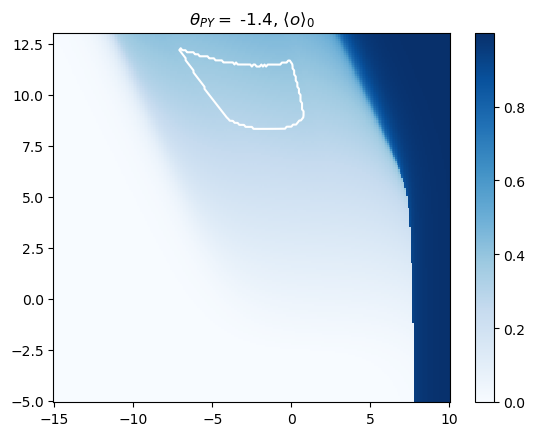

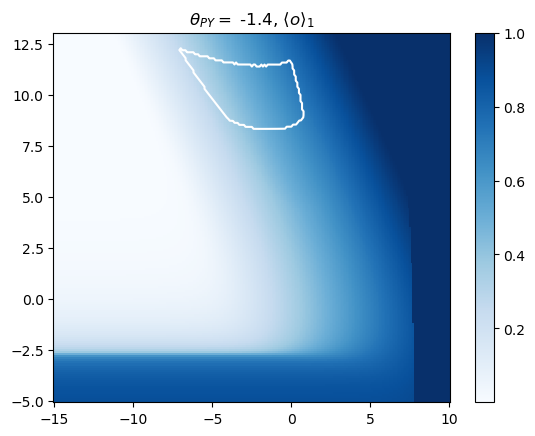

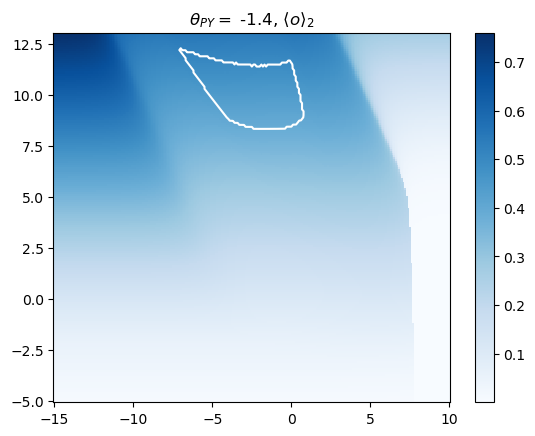

In [ ]:
labels = ['LP','PY','PD']
for i in np.where(par2res.round(2)==-1.4)[0]:
    avgs = avgs_3D[:,i,:]
    pyloric = pyloric_3D[:,i,:]
    for j in range(3):
        plt.title(r'$\theta_{PY} =$ %s, $\langle o\rangle _%s$'%(par2res[i].round(2),labels[j]))
        plt.pcolormesh(par1res,par3res,avgs[:,:,j],cmap="Blues")
        plt.colorbar()
        plt.contour(par1res,par3res,pyloric,levels=[.3],colors=['w'])
        plt.show()

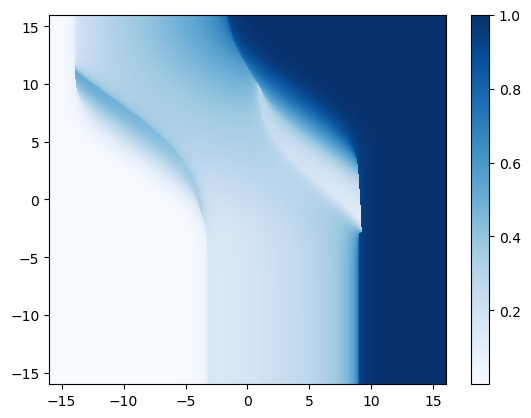

In [ ]:
#the old slice is a special case where PY was set to -8.8
par1res = np.arange(-16,16.001,.01)
par2res = par1res.copy()
avgs_old = get_avg_slice(39,slicetype='high_res')
plt.pcolormesh(par1res,par2res,avgs_old[:,:,0],cmap="Blues")
plt.colorbar()
plt.show()

In [ ]:
avgs_3D_pyloric = avgs_3D[np.where(pyloric_3D>=.3)]
avgs_3D_nonpyloric = avgs_3D[np.where(pyloric_3D<.3)]


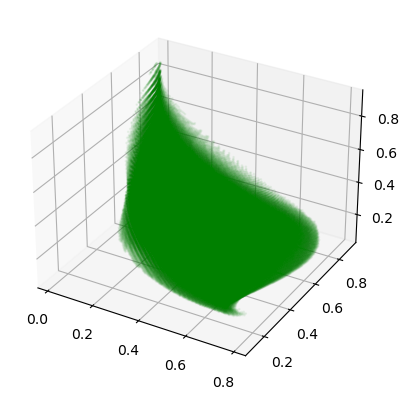

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(avgs_3D_pyloric[:,0],avgs_3D_pyloric[:,1],avgs_3D_pyloric[:,2],alpha=.05,color='g',s=1)
# ax.scatter(avgs_3D_nonpyloric[:,0],avgs_3D_nonpyloric[:,1],avgs_3D_nonpyloric[:,2],alpha=.25,color='r')
plt.show()

In [ ]:
def uniquevals_3D(avgs_3D,pyloric_3D,tolerance=0.01,listall=False):
    solvable = False
    avgs_3D_pyloric = avgs_3D[np.where(pyloric_3D>=.3)]
    avgs_3D_nonpyloric = avgs_3D[np.where(pyloric_3D<.3)]

    elimination_pyl_list = np.copy(avgs_3D_pyloric)
    nonpyloric_consideration = np.copy(avgs_3D_nonpyloric)

    valid_pyl_list = np.zeros((1000,len(elimination_pyl_list[0])))
    num_valid = 0

    while len(elimination_pyl_list>0):
        pyl_pt = elimination_pyl_list[0]
        dists_pyl = np.linalg.norm(nonpyloric_consideration-pyl_pt,axis=1)
        if np.min(dists_pyl)>tolerance:
            solvable = True
            # print(pyl_pt)
            if listall:
                valid_pyl_list[num_valid] = pyl_pt
                num_valid += 1
                elimination_pyl_list = elimination_pyl_list[1:]
                if num_valid == len(valid_pyl_list):
                    print("More than ", num_valid, "separable pyloric points")
                    break
            else:
                break
            
        else:
            nonpyl_pt = nonpyloric_consideration[np.where(dists_pyl==np.min(dists_pyl))[0][0]]
            dists_nonpyl = np.linalg.norm(elimination_pyl_list-nonpyl_pt,axis=1)
            elimination_pyl_list = elimination_pyl_list[dists_nonpyl>tolerance]
    if listall:
        return solvable, num_valid, valid_pyl_list[0:num_valid]
    else:
        print(pyl_pt)
        return solvable
    

In [ ]:
solvable, num_valid, valid_pyl_list = uniquevals_3D(avgs_3D,pyloric_3D,tolerance=0.02,listall=True)

More than  1000 separable pyloric points


In [ ]:
former = np.array([0.337302, 0.510171, 0.383765])
distances = np.linalg.norm(valid_pyl_list-former,axis=1)
print(valid_pyl_list[np.where(distances==np.max(distances))])

[[0.376788 0.620706 0.376556]]


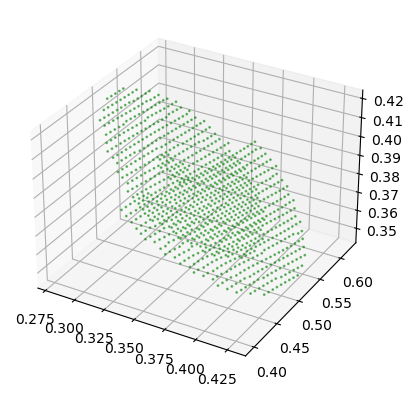

In [ ]:
#plot the set of separable pyloric points
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(valid_pyl_list[:,0],valid_pyl_list[:,1],valid_pyl_list[:,2],alpha=.5,color='g',s=1)
# ax.scatter(avgs_3D_nonpyloric[:,0],avgs_3D_nonpyloric[:,1],avgs_3D_nonpyloric[:,2],alpha=.25,color='r')
plt.show()

In [ ]:
traj = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/15/3D/biastrack.dat')

In [ ]:
time = np.arange(0,100000.0001,0.01*5)
traj = traj.reshape(25,len(time),3)

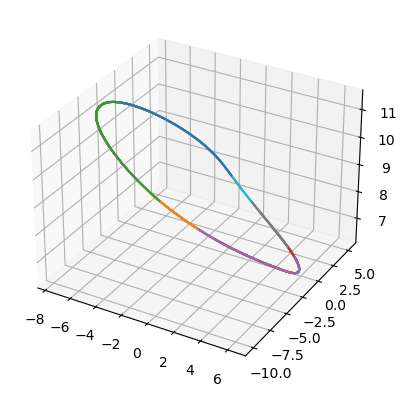

In [ ]:
#visualize the long timescale limit cycle
backup = 100000
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in range(25): 
    ax.plot(traj[i,-backup:,0],traj[i,-backup:,1],traj[i,-backup:,2])